# Airbnb Project

Airbnb is a global platform helping travelers to find home rentals and experiences all across the globe. Airbnb encourages hosts to post their listings for rental business and guests to book their stay. 

Here, for this project, we will explore the Airbnb dataset to understand what features drive revenue in the Airbnb rental business. Ultimately, our goal is to find what makes a listing successful and to help Aibnb hosts with useful insights.

# 1. Airbnb Data

Data Source: http://insideairbnb.com/get-the-data.html

Airbnb datasets:
- Listings.csv
- Reviews.csv

The above datasets provide detailed Listings data along with Reviews for each listing. Some of the features that these datasets contain are:

- <b>bedrooms:</b> number of bedrooms in a listing
- <b>bathrooms:</b> number of bathrooms in a listing
- <b>beds:</b> number of beds in a listing
- <b>property_type:</b> the type of property (House, Apartment,..., Others)
- <b>room_type:</b> the type of room (Entire Apartment or house, Shared room)
- <b>amenities:</b> amenities for the listing (Internet, TV, etc.)
- <b>price:</b> price per night
- <b>availability_30:</b> number of days available in the next 30 days
- <b>host_is_superhost:</b> is the host super host or not
- <b>review_rating_score:</b> rating from guests
- <b>number of reviews:</b> number of reviews for a listing
- <b>reviews:</b> the text of the reviews of a listing (in the "Reviews.csv" file)

In this data exploration exercise we will precise the analysis on the Airbnb listings to Los Angeles, CA, United States.

We will define <b><i>'revenue'</i></b> as the price of a listing multiplied by the number of days that the listing is booked in the next 30 days, and <b><i>'is_sucessful_c'</i></b> as a dummy variable that will take the value of 1 if revenue's listing is above the average revenue with respect to the listings with similar room type and number of bedrooms, and 0 otherwise. The latter variable, will be our target variable when we try to predict what drives success.
    
We will also process about 650,000 reviews to perform sentiment analysis on the texts. These sentiment scores of the anlysis will be an additional feature to the dataset.

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
df_listings = pd.read_csv("listings.csv")
df_reviews = pd.read_csv("reviews.csv")

# 2. Exploring and Cleaning Data

In this notebook we will explore the Airbnb dataset in order to prepare the data to get insights and to train a classifier.

The variables that we will clean and fix are the following:

- <b>property_type:</b> This attribute has a lot of different values, so we will keep just 10 categories, transforming those with the least frequency into "Other".
- <b>price:</b> This attribute is in text format, so we will transform it to numerical
- <b>dummy variables:</b> The dummy variables in the dataset have value "t" or "f", so we will transform them to dummy variables 1 and 0 respectively.
- <b>NAs:</b> Some attributes have NA values so we will fill those values
- <b>amenities:</b> Each list has a set of values with its amenities. Based on the unique list of all the amenities possible, we will create a dummy variable for each one to capture the amenities that a particular listing has.


We will create the following features:

- <b>revenue:</b> price * number of days that the listing is booked in the next 30 days
- <b>sentiment_nltk:</b> Based on the text from the reviews for each listing, we will perform sentiment analysis to get the average sentiment score for each listing. This value is a number between -1 and 1.
- <b>is_successful_c:</b> This dummy variable will take the value of 1 if revenue's listing is above the average revenue with respect to  the listings with similar room type and number of bedrooms, and 0 otherwise.
- <b>clean_perc:</b> This represents what percentage of the price is charged as cleaning fee.
- <b>request_deposit:</b> This dummy variable will take the value of 1 if the listing requires a credit deposit and 0 otherwise

## 2.1 Overview

In [3]:
##Overview of the data

len(df_listings)
df_listings.head()
df_listings.columns

df_listings.info()

31253

id                            listing_url       scrape_id  \
0  16228948  https://www.airbnb.com/rooms/16228948  20170502172350   
1   8909380   https://www.airbnb.com/rooms/8909380  20170502172350   
2  14078522  https://www.airbnb.com/rooms/14078522  20170502172350   
3  13006928  https://www.airbnb.com/rooms/13006928  20170502172350   
4   7898757   https://www.airbnb.com/rooms/7898757  20170502172350   

  last_scraped                                             name  \
0   2017-05-03  Robert Ranch in Los Angeles for filming/wedding   
1   2017-05-03                   Nice quiet private ranch house   
2   2017-05-03               Room w/private bath on Small Ranch   
3   2017-05-03                           Miller Ranch Bunkhouse   
4   2017-05-03                        Studio with full bathroom   

                                             summary  \
0  Stunning Ranch Estate situated on 20 acres and...   
1                                                NaN   
2  My place is close to Six Flags Magic Mountain ...   
3  Our place is close to great views, equestrian ...   
4  Fully furnished studio only a 10 min drive fro...   

                                               space  \
0                                                NaN   
1  Very private and quite . Hiking horse riding a...   
2               Room with queen bed and private bath   
3  Please know that we live on a dirt road but it...   
4                                                NaN   

                                         description experiences_offered  \
0  Stunning Ranch Estate situated on 20 acres and...                none   
1  Very private and quite . Hiking horse riding a...                none   
2  My place is close to Six Flags Magic Mountain ...                none   
3  Our place is close to great views, equestrian ...                none   
4  Fully furnished studio only a 10 min drive fro...                none   

                               neighborhood_overview        ...          \
0                                                NaN        ...           
1   I'm in the country what's not to love about that        ...           
2  Horse area. Trails for hiking and riding. Quie...        ...           
3                                                NaN        ...           
4                                                NaN        ...           

  review_scores_value requires_license license       jurisdiction_names  \
0                 NaN                f     NaN                      NaN   
1                 9.0                f     NaN                      NaN   
2                10.0                f     NaN                      NaN   
3                10.0                f     NaN                      NaN   
4                10.0                f     NaN  City of Los Angeles, CA   

  instant_bookable cancellation_policy require_guest_profile_picture  \
0                t              strict                             f   
1                f            flexible                             f   
2                f            flexible                             f   
3                t            flexible                             f   
4                f            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

   reviews_per_month  
0                NaN  
1               1.91  
2               1.72  
3               2.12  
4               0.18  

[5 rows x 95 columns]

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered',
       u'neighborhood_overview', u'notes', u'transit', u'access',
       u'interaction', u'house_rules', u'thumbnail_url', u'medium_url',
       u'picture_url', u'xl_picture_url', u'host_id', u'host_url',
       u'host_name', u'host_since', u'host_location', u'host_about',
       u'host_response_time', u'host_response_rate', u'host_acceptance_rate',
       u'host_is_superhost', u'host_thumbnail_url', u'host_picture_url',
       u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'prope

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31253 entries, 0 to 31252
Data columns (total 95 columns):
id                                  31253 non-null int64
listing_url                         31253 non-null object
scrape_id                           31253 non-null int64
last_scraped                        31253 non-null object
name                                31246 non-null object
summary                             30417 non-null object
space                               21866 non-null object
description                         31238 non-null object
experiences_offered                 31253 non-null object
neighborhood_overview               18575 non-null object
notes                               13815 non-null object
transit                             18164 non-null object
access                              19074 non-null object
interaction                         18262 non-null object
house_rules                         22047 non-null object
thumbnail_url          

In [4]:
##Check some features

df_listings[['id','city','state','market','property_type','room_type','accommodates','bathrooms','bedrooms','beds',
             'bed_type','amenities','square_feet','price','availability_30','availability_60','availability_90',
             'availability_365','number_of_reviews','reviews_per_month','review_scores_rating','last_scraped']]

id             city state            market    property_type  \
0      16228948            Acton    CA  Other (Domestic)            House   
1       8909380         Palmdale    CA  Other (Domestic)            House   
2      14078522            Acton    CA  Other (Domestic)            House   
3      13006928            Acton    CA  Other (Domestic)            Other   
4       7898757      Los Angeles    CA       Los Angeles        Apartment   
5      11254337      Los Angeles    CA       Los Angeles        Apartment   
6      16068508      Los Angeles    CA       Los Angeles            House   
7        654641      Los Angeles    CA       Los Angeles            House   
8      14859779      Los Angeles    CA       Los Angeles            House   
9       4839375      Los Angeles    CA       Los Angeles            House   
10     14281484      Los Angeles    CA       Los Angeles       Guesthouse   
11      8428885      Los Angeles    CA       Los Angeles            House   
12      1557529      Los Angeles    CA       Los Angeles            House   
13     18042820      Los Angeles    CA       Los Angeles            House   
14      5393269      Los Angeles    CA       Los Angeles  Bed & Breakfast   
15      5851860      Los Angeles    CA       Los Angeles            House   
16     17144596      Los Angeles    CA       Los Angeles        Apartment   
17      6153123      Los Angeles    CA       Los Angeles            Other   
18     13748272      Los Angeles    CA       Los Angeles             Loft   
19      4172374      Los Angeles    CA       Los Angeles            House   
20      9174553      Los Angeles    CA       Los Angeles            House   
21      2516036      Los Angeles    CA       Los Angeles        Apartment   
22      9303822      Los Angeles    CA       Los Angeles        Apartment   
23     17808419      Los Angeles    CA       Los Angeles            House   
24      3052357      Los Angeles    CA       Los Angeles        Apartment   
25     15236748      Los Angeles    CA       Los Angeles            House   
26      1471992      Los Angeles    CA       Los Angeles            House   
27      1552495      Los Angeles    CA       Los Angeles            House   
28     18111734      Los Angeles    CA       Los Angeles            House   
29      9167855      Los Angeles    CA       Los Angeles        Apartment   
...         ...              ...   ...               ...              ...   
31223   6034103   Woodland Hills    CA       Los Angeles            Other   
31224  10228249      Los Angeles    CA       Los Angeles            House   
31225  14750638  Woodland Hills     CA       Los Angeles            House   
31226  14749746      Los Angeles    CA       Los Angeles       Guesthouse   
31227    724996   Woodland Hills    CA       Los Angeles            House   
31228  17240639      Los Angeles    CA       Los Angeles            House   
31229  11734816      Los Angeles    CA       Los Angeles        Apartment   
31230   5508599      Los Angeles    CA       Los Angeles            House   
31231   2331968      Los Angeles    CA       Los Angeles  Bed & Breakfast   
31232   7604856      Los Angeles    CA       Los Angeles            House   
31233  10881592      Los Angeles    CA       Los Angeles            House   
31234  17303910      Los Angeles    CA       Los Angeles            House   
31235   1312618   Woodland Hills    CA       Los Angeles        Apartment   
31236  13961328      Los Angeles    CA       Los Angeles            House   
31237  15991936      Los Angeles    CA       Los Angeles            House   
31238  15860751      Los Angeles    CA       Los Angeles            House   
31239   1312336   Woodland Hills    CA       Los Angeles        Apartment   
31240  17302114      Los Angeles    CA       Los Angeles        Apartment   
31241  17302014      Los Angeles    CA       Los Angeles            House   
31242  17957270      Los Angeles    CA       Los Angeles      Guest suite   
31243  16

## 2.2 Property_type: limit the list to the ten most frequent

In [5]:
#Explore property_type

df_listings['property_type'].value_counts()

df_listings['property_type'].value_counts()/df_listings['property_type'].value_counts().sum()*100

#With 10 categories we account for 98% of the listings

(df_listings['property_type'].value_counts()/df_listings['property_type'].value_counts().sum()*100)[0:10].sum()

Apartment             13801
House                 12736
Condominium             917
Townhouse               769
Loft                    563
Guesthouse              560
Bungalow                455
Bed & Breakfast         328
Other                   318
Villa                   234
Dorm                    128
Camper/RV               109
Cabin                    77
Hostel                   66
Boat                     44
Guest suite              25
Boutique hotel           23
Tent                     18
Serviced apartment       14
Yurt                     10
Castle                   10
Treehouse                 9
Vacation home             9
Hut                       8
Chalet                    4
Earth House               4
Tipi                      4
In-law                    3
Train                     1
Parking Space             1
Lighthouse                1
Casa particular           1
Plane                     1
Cave                      1
Island                    1
Name: property_type,

Apartment             44.158961
House                 40.751288
Condominium            2.934118
Townhouse              2.460564
Loft                   1.801427
Guesthouse             1.791828
Bungalow               1.455860
Bed & Breakfast        1.049499
Other                  1.017502
Villa                  0.748728
Dorm                   0.409561
Camper/RV              0.348767
Cabin                  0.246376
Hostel                 0.211180
Boat                   0.140786
Guest suite            0.079992
Boutique hotel         0.073593
Tent                   0.057594
Serviced apartment     0.044796
Yurt                   0.031997
Castle                 0.031997
Treehouse              0.028797
Vacation home          0.028797
Hut                    0.025598
Chalet                 0.012799
Earth House            0.012799
Tipi                   0.012799
In-law                 0.009599
Train                  0.003200
Parking Space          0.003200
Lighthouse             0.003200
Casa par

98.16977570153266

In [6]:
##Keep just the ten main types and classify the rest as Other

to_change=df_listings['property_type'].value_counts()[10:len(df_listings['property_type'].value_counts())].index.tolist()

def change_prop_type(label):
    if label in to_change:
        label='Other'
    return label
        

##Check    

df_test=df_listings.head()
df_test.property_type[1]='Plane'
df_test.property_type
df_test.loc[:,'property_type']=df_test.loc[:,'property_type'].apply(change_prop_type)
df_test.property_type

0        House
1        Plane
2        House
3        Other
4    Apartment
Name: property_type, dtype: object

0        House
1        Other
2        House
3        Other
4    Apartment
Name: property_type, dtype: object

In [7]:
##Change property types

df_listings_new=df_listings

df_listings_new.loc[:,'property_type']=df_listings_new.loc[:,'property_type'].apply(change_prop_type)


In [8]:
##Check

df_listings_new['property_type'].value_counts()

Apartment          13801
House              12735
Condominium          917
Other                891
Townhouse            769
Loft                 563
Guesthouse           560
Bungalow             455
Bed & Breakfast      328
Villa                234
Name: property_type, dtype: int64

## 2.3 Explore room_type and bed_type

In [9]:
#Explore room_type

df_listings_new['room_type'].value_counts()

Entire home/apt    17995
Private room       11623
Shared room         1635
Name: room_type, dtype: int64

In [10]:
#Explore bed_type

df_listings_new['bed_type'].value_counts()

Real Bed         30401
Futon              313
Pull-out Sofa      202
Airbed             194
Couch              143
Name: bed_type, dtype: int64

In [11]:
#Explore ammenities

df_listings_new[df_listings_new['id']==16228948]['amenities'].values[0]

'{"Wireless Internet","Air conditioning",Pool,Kitchen,"Free parking on premises",Gym,"Hot tub","Indoor fireplace",Heating,"Family/kid friendly","Suitable for events",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_50"}'

## 2.4 Explore amenities

In [12]:
#Create a function to get ammenities

def get_amenities(column):
    am_list=[]
    for am in column:
        am=am.replace('"','')
        am=am.replace('{','')
        am=am.replace('}','')
        am_list += am.split(',')

    #am_list=am_list.remove('translation missing: en.hosting_amenity_50')    
    #am_list=am_list.remove('translation missing: en.hosting_amenity_49')
    
    am_list2=pd.DataFrame(am_list) #Transform list into a data frame

    am_list2.rename(columns={0:'amenities'},inplace=True) #replace name to categories

    am_list2=am_list2.groupby('amenities')['amenities'].count().sort_values(ascending=False) #group by category and count.
    am_list2.rename(columns={'amenities':'count'},inplace=True) #Rename column to count to then drop one level
    am_list2.reset_index(level=0)
    return am_list2

In [13]:
#Get amenities

amenities=get_amenities(df_listings_new.amenities) #Total

amenities = amenities.drop(['translation missing: en.hosting_amenity_50'],axis=0)

amenities = amenities.drop(['translation missing: en.hosting_amenity_49'],axis=0)

amenities

amenities/amenities.sum()*100 #Percentage of total tags

(amenities[0:35]/amenities.sum()*100).sum()

amenities[0:35]

amenities
Wireless Internet             29659
Kitchen                       27719
Heating                       26830
Essentials                    26545
Smoke detector                26128
TV                            23587
Washer                        23227
Dryer                         22922
Shampoo                       22335
Air conditioning              21833
Hangers                       21374
Internet                      20974
Free parking on premises      20374
Carbon monoxide detector      19883
Laptop friendly workspace     18924
Hair dryer                    18778
Iron                          17907
Family/kid friendly           17558
Fire extinguisher             14095
First aid kit                 13333
Cable TV                      11079
24-hour check-in               9559
Indoor fireplace               7149
Lock on bedroom door           6952
Pool                           6905
Elevator in building           6093
Hot tub                        5505
Safety card       

amenities
Wireless Internet             5.454649
Kitchen                       5.097860
Heating                       4.934362
Essentials                    4.881947
Smoke detector                4.805255
TV                            4.337935
Washer                        4.271726
Dryer                         4.215633
Shampoo                       4.107677
Air conditioning              4.015353
Hangers                       3.930937
Internet                      3.857372
Free parking on premises      3.747025
Carbon monoxide detector      3.656724
Laptop friendly workspace     3.480353
Hair dryer                    3.453502
Iron                          3.293314
Family/kid friendly           3.229129
Fire extinguisher             2.592241
First aid kit                 2.452100
Cable TV                      2.037562
24-hour check-in              1.758016
Indoor fireplace              1.314788
Lock on bedroom door          1.278557
Pool                          1.269913
Elevator in bui

96.01977422950024

amenities
Wireless Internet             29659
Kitchen                       27719
Heating                       26830
Essentials                    26545
Smoke detector                26128
TV                            23587
Washer                        23227
Dryer                         22922
Shampoo                       22335
Air conditioning              21833
Hangers                       21374
Internet                      20974
Free parking on premises      20374
Carbon monoxide detector      19883
Laptop friendly workspace     18924
Hair dryer                    18778
Iron                          17907
Family/kid friendly           17558
Fire extinguisher             14095
First aid kit                 13333
Cable TV                      11079
24-hour check-in               9559
Indoor fireplace               7149
Lock on bedroom door           6952
Pool                           6905
Elevator in building           6093
Hot tub                        5505
Safety card       

We will take care of the amenities later

## 2.5 Transform the variable price from text to numerical

In [14]:
##Clean Prices

df_listings_new['price']=df_listings_new['price'].str.strip('$')
df_listings_new['price']=df_listings_new['price'].str.replace(',','')
df_listings_new['price']=df_listings_new['price'].astype(float)


In [15]:
#Check prices

df_listings_new['price'].head()

0    3000.0
1      50.0
2      55.0
3     150.0
4      30.0
Name: price, dtype: float64

## 2.6 Calculate occupancy rates

In [16]:
#Calculate Occupancy rates

df_listings_new['occupancy_rate_30']=((30-df_listings_new['availability_30'])*1.0)/30
df_listings_new['occupancy_rate_90']=((90-df_listings_new['availability_90'])*1.0)/90
df_listings_new['occupancy_rate_365']=((365-df_listings_new['availability_365'])*1.0)/365
df_listings_new['occupancy_rate_90_avg']=((df_listings_new['occupancy_rate_30']+df_listings_new['occupancy_rate_90'])*1.0)/2
df_listings_new['occupancy_rate_avg']=((df_listings_new['occupancy_rate_30']+df_listings_new['occupancy_rate_90']+
                                                       df_listings_new['occupancy_rate_365'])*1.0)/3

df_listings_new[['id','availability_30','availability_90','availability_365',
                'occupancy_rate_30','occupancy_rate_90','occupancy_rate_365',
                'occupancy_rate_90_avg']]

id  availability_30  availability_90  availability_365  \
0      16228948               27               82               352   
1       8909380               29               75               350   
2      14078522               18               73               348   
3      13006928                3               30                87   
4       7898757                0                0                 0   
5      11254337                4               32                32   
6      16068508                6               42                42   
7        654641               22               82               357   
8      14859779               29               89               364   
9       4839375               10               45               306   
10     14281484                0               20               106   
11      8428885                3               36               249   
12      1557529               20               76               351   
13     18042820                7               40                67   
14      5393269                0                0                 0   
15      5851860               17               41                41   
16     17144596               25               85                85   
17      6153123               27               70               338   
18     13748272                0                0                 0   
19      4172374               29               89               360   
20      9174553               24               75                75   
21      2516036               29               82               357   
22      9303822                0                0                 0   
23     17808419               29               89                89   
24      3052357                6               18               235   
25     15236748               10               48               170   
26      1471992               17               74               349   
27      1552495                0               52               327   
28     18111734               25               28                28   
29      9167855                0                0                 0   
...         ...              ...              ...               ...   
31223   6034103                0                0                 0   
31224  10228249                0               30                30   
31225  14750638               30               90               180   
31226  14749746               30               90               365   
31227    724996                0                0                 0   
31228  17240639                0               60               335   
31229  11734816               29               89               179   
31230   5508599                5               60               335   
31231   2331968               30               90               365   
31232   7604856               28               88               363   
31233  10881592                0               23               266   
31234  17303910               30               90               365   
31235   1312618               10               70               340   
31236  13961328                0                0                 0   
31237  15991936               15               75                75   
31238  15860751               16               53               310   
31239   1312336                5               43               313   
31240  17302114                6               59               149   
31241  17302014                0                0               274   
31242  17957270               16               19                19   
31243  16027372                4               10                10   
31244  18477878               13               17                17   
31245  18162696                5               21                21   
31246  18506757               24               84               174   
31247  18079889                6     

## 2.7 Fill Nas in reviews_per_month

In [17]:
##Replace NAs in reviews_per_month

df_listings_new['reviews_per_month']=df_listings_new['reviews_per_month'].fillna(value=0)

#Check

df_listings_new['reviews_per_month'].head()

0    0.00
1    1.91
2    1.72
3    2.12
4    0.18
Name: reviews_per_month, dtype: float64

## 2.8 Transform dummy variables to 0,1 dummies

In [18]:
##Change some columns to 0-1 dummies

df_listings_new['host_is_superhost']=(df_listings_new['host_is_superhost']=='t')*1.0
df_listings_new['host_has_profile_pic']=(df_listings_new['host_has_profile_pic']=='t')*1.0
df_listings_new['host_identity_verified']=(df_listings_new['host_identity_verified']=='t')*1.0
df_listings_new['instant_bookable']=(df_listings_new['instant_bookable']=='t')*1.0
df_listings_new['require_guest_profile_picture']=(df_listings_new['require_guest_profile_picture']=='t')*1.0
df_listings_new['require_guest_phone_verification']=(df_listings_new['require_guest_phone_verification']=='t')*1.0

In [19]:
##Create a copy of the new data frame

df_listings_new.to_csv('listings_new.csv')

## 2.9 Sentiment Analysis 

In this section we will work with the reviews data frame, which contains the text for more than 650,000 listing's reviews.
We will use the libraries TextBlob and Nltk with built-in capabilities for natural language processing to process each review and compare results in order to keep the best.

As a result of the analysis we will get a polarity score between -1 and 1 for each review, being -1 a strongly negative sentiment, 0 a neutral sentiment and 1 a strongly positive sentiment.

<i><b>CAUTION : SENTIMENT ANALYSIS EXECUTION TAKES A LONG TIME</b></i>

<i>To save time, this part can be skipped and run the code from section 3 reading the processed file "listings_new_sent_am.csv"

In [20]:
#Check reviews table

df_reviews.head()
df_reviews.columns
len(df_reviews)

listing_id        id        date  reviewer_id reviewer_name  \
0     6783213  36712113  2015-06-30     27267346        Montai   
1     6783213  36922154  2015-07-02     27859341         Kevin   
2     6783213  82621340  2016-06-28      4044081       Gabriel   
3     6783213  84473014  2016-07-07      3137544      Delphine   
4     6783213  85517121  2016-07-11     34035327       Michele   

                                            comments  
0  This was my first Airbnb experience and it wen...  
1  Absolutely Fantastic place ! Great location an...  
2  The host canceled this reservation 26 days bef...  
3  The host canceled this reservation 39 days bef...  
4  Unfortunately I do have some very negative fee...

Index([u'listing_id', u'id', u'date', u'reviewer_id', u'reviewer_name',
       u'comments'],
      dtype='object')

651938

### 2.9.1 Sentiment analysis with TextBlob

The polarity score between -1 and 1 will be stored in the variable "sentiment"

In [21]:
##Try sentiment analysis with textblob

from textblob import TextBlob

In [22]:

def get_sentiment(text):
    testimonial = TextBlob(text)
    testimonial.sentiment
    return testimonial.sentiment.polarity

In [23]:
##Chech the function


x=df_reviews['comments'].head(1).values[0]
x
get_sentiment(x)

x=df_reviews.loc[2].comments
x
get_sentiment(x)

x=df_reviews.loc[4].comments
x
get_sentiment(x)

'This was my first Airbnb experience and it went great! The place was as described in a great neighborhood just as stated. Audis and Lee were great, they were quick to respond, very attentive and made sure I had everything I needed. Overall great experience.'

0.5559259259259259

'The host canceled this reservation 26 days before arrival. This is an automated posting.'

0.0

"Unfortunately I do have some very negative feedback but I will start with the good. Audis was very nice and accommodating with check-in. It was a great location and a safe area. The bathrooms were clean. However, the carpet was old and filthy.  White couch was a bit dirty. Kitchen chairs were sticky. No air conditioning though it wasn't too hot with some open windows. Nice balcony to have coffee on.  It was a fairly inexpensive place to lay your head. However, the really bad part which surprised me were the sheets on the bed were beyond disgusting. I slept on them one night before I realized what they looked like.   Large semen stains, and blood stains from a woman who was obviously on her period and had leakage. This is completely unacceptable. I don't like to leave a bad review and rarely do so. But this was so bad I had to mention it. Also no was cloths for bathing, only towels. If the sheets on the bed were clean I would have given an overall rating of 3 stars for the price, locat

0.018059964726631423

In [24]:
##Sentiment analysis on batches.

##For performance reasons, we will split the reviews data frame in ten 
##subsets to perform the sentiment analysis.

partitions=round(len(df_reviews)*1.0/10,0)
partitions=int(partitions)
adj=int(len(df_reviews)-partitions*10)

df_reviews_1=df_reviews[0:partitions]
df_reviews_2=df_reviews[partitions:partitions*2]
df_reviews_3=df_reviews[partitions*2:partitions*3]
df_reviews_4=df_reviews[partitions*3:partitions*4]
df_reviews_5=df_reviews[partitions*4:partitions*5]
df_reviews_6=df_reviews[partitions*5:partitions*6]
df_reviews_7=df_reviews[partitions*6:partitions*7]
df_reviews_8=df_reviews[partitions*7:partitions*8]
df_reviews_9=df_reviews[partitions*8:partitions*9]
df_reviews_10=df_reviews[partitions*9:(partitions*10+adj)]

#Check the splits

df_reviews_1.tail()
df_reviews_2.head()
df_reviews_2.tail()
df_reviews_3.head()

df_reviews_10.tail()
len(df_reviews)

listing_id        id        date  reviewer_id reviewer_name  \
65189     3137921  64722743  2016-03-06      7309650        Kelsey   
65190     3137921  65521891  2016-03-15     10343761         Karen   
65191     3137921  65856878  2016-03-17     49166029        Jeremy   
65192     3137921  66242186  2016-03-20     38857296         Josie   
65193     3137921  66718138  2016-03-24     13543551           Dan   

                                                comments  
65189                                         Wonderful!  
65190  I met Sheila outside one morning.  She was ful...  
65191  Sheila was lovely. And this spot is a real gem...  
65192  As describe, beautiful 1 bedroom with amazing ...  
65193  Sheila's apartment was incredibly beautiful an...

listing_id        id        date  reviewer_id reviewer_name  \
65194     3137921  69002974  2016-04-08     62161775          Fred   
65195     3137921  69780251  2016-04-13     54557251         Ellen   
65196     3137921  70446548  2016-04-17     54519722          Rita   
65197     3137921  71018368  2016-04-22      3017641      Samantha   
65198     3137921  71200948  2016-04-24      2196496       Melissa   

                                                comments  
65194  Views are fantastic in a very quiet neighborho...  
65195  Beautiful place to stay. Very clean, quiet, an...  
65196  we had an amazing experience at sheila's space...  
65197  This was an absolutely wonderful experience.  ...  
65198  We had a wonderful stay in the townhouse. Alth...

listing_id         id        date  reviewer_id reviewer_name  \
130383      956342  106759262  2016-10-07      5794653         Aimee   
130384      956342  106946384  2016-10-08     48648841           Amy   
130385      956342  107720008  2016-10-11     41406852         JuJue   
130386      956342  109042899  2016-10-18     32005521       Gonzalo   
130387      956342  109460465  2016-10-21     16122198         Peter   

                                                 comments  
130383  Location was great for exploring Venice beach ...  
130384  We got in quite late from flight but Tiffany a...  
130385  Very great appartment near the beach and good ...  
130386  The place was spacious, clean and very well lo...  
130387  Great stay. Close to all that Venice and Santa...

listing_id         id        date  reviewer_id reviewer_name  \
130388      956342  115068705  2016-11-21      8520428   Barry&Tracy   
130389      956342  116339152  2016-11-29     10910416       Daniela   
130390      956342  116679133  2016-12-02     44284686          John   
130391      956342  120085792  2016-12-07     36235998       Melissa   
130392      956342  121761679  2016-12-18      6592766      Benjamin   

                                                 comments  
130388  The apartment appeared larger in the photos.  ...  
130389  Hermoso barrio, muy tranquilo. El departamento...  
130390  Tiffany and Janin's place is a perfect locatio...  
130391  This location is great! A short stroll to the ...  
130392                      Good location and super clean

listing_id         id        date  reviewer_id reviewer_name  \
651933     7600986  142331483  2017-04-07     90002103        Olivia   
651934     7600986  142935447  2017-04-09     34542544             S   
651935     7600986  145558963  2017-04-18      6061984    Alexandria   
651936     7600986  147265708  2017-04-25     20947627       Rodrigo   
651937     7600986  148030099  2017-04-29     34542544             S   

                                                 comments  
651933  Excellent Host & Location. Sophie was amazing ...  
651934  I had a very wonderful stay at Sophie's place....  
651935  Great location in Beverly Hills, walking dista...  
651936  Sophie it's a great host, her place is very ni...  
651937  I had a very wonderful stay at Sophie's place....

651938

In [25]:
#Test on a subset

df_reviews_1_test=df_reviews_1.head()

df_reviews_1_test['sentiment']=df_reviews_1_test['comments'].apply(get_sentiment)
df_reviews_1_test

listing_id        id        date  reviewer_id reviewer_name  \
0     6783213  36712113  2015-06-30     27267346        Montai   
1     6783213  36922154  2015-07-02     27859341         Kevin   
2     6783213  82621340  2016-06-28      4044081       Gabriel   
3     6783213  84473014  2016-07-07      3137544      Delphine   
4     6783213  85517121  2016-07-11     34035327       Michele   

                                            comments  sentiment  
0  This was my first Airbnb experience and it wen...   0.555926  
1  Absolutely Fantastic place ! Great location an...   0.650000  
2  The host canceled this reservation 26 days bef...   0.000000  
3  The host canceled this reservation 39 days bef...   0.000000  
4  Unfortunately I do have some very negative fee...   0.018060

In [26]:
#Apply get sentiment batch 1

df_reviews_1['comments']=df_reviews_1['comments'].apply(lambda x: str(x).decode('utf-8'))
df_reviews_1['sentiment']=df_reviews_1['comments'].apply(get_sentiment)

In [27]:
df_reviews_1.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     6783213  36712113  2015-06-30     27267346        Montai   
1     6783213  36922154  2015-07-02     27859341         Kevin   
2     6783213  82621340  2016-06-28      4044081       Gabriel   
3     6783213  84473014  2016-07-07      3137544      Delphine   
4     6783213  85517121  2016-07-11     34035327       Michele   

                                            comments  sentiment  
0  This was my first Airbnb experience and it wen...   0.555926  
1  Absolutely Fantastic place ! Great location an...   0.650000  
2  The host canceled this reservation 26 days bef...   0.000000  
3  The host canceled this reservation 39 days bef...   0.000000  
4  Unfortunately I do have some very negative fee...   0.018060

In [28]:
#Apply get sentiment batch 2

df_reviews_2['comments']=df_reviews_2['comments'].apply(lambda x: str(x).decode('utf-8'))
df_reviews_2['sentiment']=df_reviews_2['comments'].apply(get_sentiment)

In [29]:
df_reviews_2.head()

listing_id        id        date  reviewer_id reviewer_name  \
65194     3137921  69002974  2016-04-08     62161775          Fred   
65195     3137921  69780251  2016-04-13     54557251         Ellen   
65196     3137921  70446548  2016-04-17     54519722          Rita   
65197     3137921  71018368  2016-04-22      3017641      Samantha   
65198     3137921  71200948  2016-04-24      2196496       Melissa   

                                                comments  sentiment  
65194  Views are fantastic in a very quiet neighborho...   0.350000  
65195  Beautiful place to stay. Very clean, quiet, an...   0.436667  
65196  we had an amazing experience at sheila's space...   0.397222  
65197  This was an absolutely wonderful experience.  ...   0.737500  
65198  We had a wonderful stay in the townhouse. Alth...   0.333948

In [30]:
#Apply get sentiment batch 3

df_reviews_3['comments']=df_reviews_3['comments'].apply(lambda x: str(x).decode('utf-8'))
df_reviews_3['sentiment']=df_reviews_3['comments'].apply(get_sentiment)

In [31]:
df_reviews_3.head()

listing_id         id        date  reviewer_id reviewer_name  \
130388      956342  115068705  2016-11-21      8520428   Barry&Tracy   
130389      956342  116339152  2016-11-29     10910416       Daniela   
130390      956342  116679133  2016-12-02     44284686          John   
130391      956342  120085792  2016-12-07     36235998       Melissa   
130392      956342  121761679  2016-12-18      6592766      Benjamin   

                                                 comments  sentiment  
130388  The apartment appeared larger in the photos.  ...  -0.109792  
130389  Hermoso barrio, muy tranquilo. El departamento...   0.000000  
130390  Tiffany and Janin's place is a perfect locatio...   0.616667  
130391  This location is great! A short stroll to the ...   0.274722  
130392                      Good location and super clean   0.466667

In [32]:
#Apply get sentiment batch 4

df_reviews_4['comments']=df_reviews_4['comments'].apply(lambda x: str(x).decode('utf-8'))
df_reviews_4['sentiment']=df_reviews_4['comments'].apply(get_sentiment)

In [33]:
#Apply get sentiment batch 5

df_reviews_5['comments']=df_reviews_5['comments'].apply(lambda x: str(x).decode('utf-8'))
df_reviews_5['sentiment']=df_reviews_5['comments'].apply(get_sentiment)

In [34]:
#Apply get sentiment batch 6

df_reviews_6['comments']=df_reviews_6['comments'].apply(lambda x: str(x).decode('utf-8'))
df_reviews_6['sentiment']=df_reviews_6['comments'].apply(get_sentiment)

In [35]:
#Apply get sentiment batch 7

df_reviews_7['comments']=df_reviews_7['comments'].apply(lambda x: str(x).decode('utf-8'))
df_reviews_7['sentiment']=df_reviews_7['comments'].apply(get_sentiment)

In [36]:
#Apply get sentiment batch 8

df_reviews_8['comments']=df_reviews_8['comments'].apply(lambda x: str(x).decode('utf-8'))
df_reviews_8['sentiment']=df_reviews_8['comments'].apply(get_sentiment)

In [37]:
#Apply get sentiment batch 9

df_reviews_9['comments']=df_reviews_9['comments'].apply(lambda x: str(x).decode('utf-8'))
df_reviews_9['sentiment']=df_reviews_9['comments'].apply(get_sentiment)

In [38]:
#Apply get sentiment batch 10

df_reviews_10['comments']=df_reviews_10['comments'].apply(lambda x: str(x).decode('utf-8'))
df_reviews_10['sentiment']=df_reviews_10['comments'].apply(get_sentiment)

In [39]:
#Putting all sub sets together and check dimensions

frames=[df_reviews_1, df_reviews_2, df_reviews_3, df_reviews_4, df_reviews_5,
       df_reviews_6, df_reviews_7, df_reviews_8, df_reviews_9, df_reviews_10]

df_reviews_sentiment = pd.concat(frames)

len(df_reviews_sentiment)


651938

### 2.9.2 Sentiment analysis with nltk

The polarity score between -1 and 1 will be stored in the variable <b>'sentiment_nltk'</b>

In [40]:
##Sentiment analysis with nltk

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [41]:
def get_sentiment_nltk(text):
    sid=SentimentIntensityAnalyzer()
    ss=sid.polarity_scores(text)
    return ss['compound']

In [42]:
#Apply get sentiment batch 1

df_reviews_1['sentiment_nltk']=df_reviews_1['comments'].apply(get_sentiment_nltk)

In [43]:
#Apply get sentiment batch 2

df_reviews_2['sentiment_nltk']=df_reviews_2['comments'].apply(get_sentiment_nltk)

In [44]:
#Apply get sentiment batch 3

df_reviews_3['sentiment_nltk']=df_reviews_3['comments'].apply(get_sentiment_nltk)

In [45]:
#Apply get sentiment batch 4

df_reviews_4['sentiment_nltk']=df_reviews_4['comments'].apply(get_sentiment_nltk)

In [46]:
#Apply get sentiment batch 5

df_reviews_5['sentiment_nltk']=df_reviews_5['comments'].apply(get_sentiment_nltk)

In [47]:
#Apply get sentiment batch 6

df_reviews_6['sentiment_nltk']=df_reviews_6['comments'].apply(get_sentiment_nltk)

In [48]:
#Apply get sentiment batch 7

df_reviews_7['sentiment_nltk']=df_reviews_7['comments'].apply(get_sentiment_nltk)

In [49]:
#Apply get sentiment batch 8

df_reviews_8['sentiment_nltk']=df_reviews_8['comments'].apply(get_sentiment_nltk)

In [50]:
#Apply get sentiment batch 9

df_reviews_9['sentiment_nltk']=df_reviews_9['comments'].apply(get_sentiment_nltk)

In [51]:
#Apply get sentiment batch 10

df_reviews_10['sentiment_nltk']=df_reviews_10['comments'].apply(get_sentiment_nltk)

In [52]:
#Putting all sub sets together and check dimensions

frames=[df_reviews_1, df_reviews_2, df_reviews_3, df_reviews_4, df_reviews_5,
       df_reviews_6, df_reviews_7, df_reviews_8, df_reviews_9, df_reviews_10]

df_reviews_sentiment = pd.concat(frames)

len(df_reviews_sentiment)

651938

In [53]:
##Save a copy of the reviews data frame with sentiment analysis

df_reviews_sentiment.to_csv('reviews_sentiment.csv',encoding='utf-8')

### 2.9.3 Get the average sentiment for each listing to then merge with the listings data frame

In [54]:
##Get the mean of each listing

df_reviews_sent_list=pd.DataFrame(df_reviews_sentiment.groupby('listing_id',as_index=False).agg({
    'sentiment':'mean','sentiment_nltk':'mean'}))
                                  
df_reviews_sent_list.head()

listing_id  sentiment_nltk  sentiment
0         109        0.479400   0.178333
1         344        0.492650   0.228943
2         941        0.889750   0.522500
3        2732        0.916556   0.380451
4        3021        0.679450   0.374992

In [55]:
##Merge listing dataset with sentiment analysis

df_listings_new_sent=df_listings_new.merge(df_reviews_sent_list,left_on='id', right_on='listing_id',how='left')

#Check dimensions

len(df_listings_new_sent)
len(df_listings_new)

31253

31253

In [56]:
df_listings_new_sent.head(1)

id                            listing_url       scrape_id  \
0  16228948  https://www.airbnb.com/rooms/16228948  20170502172350   

  last_scraped                                             name  \
0   2017-05-03  Robert Ranch in Los Angeles for filming/wedding   

                                             summary space  \
0  Stunning Ranch Estate situated on 20 acres and...   NaN   

                                         description experiences_offered  \
0  Stunning Ranch Estate situated on 20 acres and...                none   

  neighborhood_overview    ...     calculated_host_listings_count  \
0                   NaN    ...                                  1   

  reviews_per_month occupancy_rate_30 occupancy_rate_90 occupancy_rate_365  \
0               0.0               0.1          0.088889           0.035616   

  occupancy_rate_90_avg occupancy_rate_avg listing_id sentiment_nltk  \
0              0.094444           0.074835        NaN            NaN   

   sentiment  
0        NaN  

[1 rows x 103 columns]

In [57]:
##Save merged data frame

df_listings_new_sent.to_csv('listings_new_sent.csv')

## 2.10 Transform amenities to dummies

We need to create a dummy variable for each type of amenitie, we will need that later in our classification
problem.

In [58]:
import pandas as pd

In [59]:
df_listings_new_sent = pd.read_csv("listings_new_sent.csv")

In [60]:
##Create dummies for the ammenities

import numpy as np

##Clean and separate properly

am=df_listings_new_sent['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")]))


##Create the list of unique amenities

am_list=np.unique(np.concatenate(am.map(lambda amns: amns.split("|"))))[1:]


##Split amenities

am_s=am.map(lambda amns: amns.split("|"))

##Create an array with true or false for each listing

amenity_array = np.array([am_s.map(lambda amns: amn in amns) for amn in am_list.tolist()])
amenity_array = np.transpose(amenity_array)

##Add the new dummies

df_listings_new_sent_am = pd.concat([df_listings_new_sent, pd.DataFrame(data=amenity_array, columns=am_list)], axis=1)



In [61]:
##Check

df_listings_new_sent_am.head(2)

Unnamed: 0        id                            listing_url  \
0           0  16228948  https://www.airbnb.com/rooms/16228948   
1           1   8909380   https://www.airbnb.com/rooms/8909380   

        scrape_id last_scraped  \
0  20170502172350   2017-05-03   
1  20170502172350   2017-05-03   

                                              name  \
0  Robert Ranch in Los Angeles for filming/wedding   
1                   Nice quiet private ranch house   

                                             summary  \
0  Stunning Ranch Estate situated on 20 acres and...   
1                                                NaN   

                                               space  \
0                                                NaN   
1  Very private and quite . Hiking horse riding a...   

                                         description experiences_offered  \
0  Stunning Ranch Estate situated on 20 acres and...                none   
1  Very private and quite . Hiking horse riding a...                none   

                     ...                         TV Table corner guards  \
0                    ...                      False               False   
1                    ...                      False               False   

  Washer Washer / Dryer Wheelchair accessible Wide hallway clearance  \
0   True          False                 False                  False   
1  False          False                 False                  False   

  Window guards Wireless Internet translation missing: en.hosting_amenity_49  \
0         False              True                                      False   
1         False             False                                      False   

  translation missing: en.hosting_amenity_50  
0                                       True  
1                                      False  

[2 rows x 196 columns]

In [62]:
##Drop meaningless columns

df_listings_new_sent_am = df_listings_new_sent_am.drop(['translation missing: en.hosting_amenity_49','translation missing: en.hosting_amenity_50'],axis=1)

df_listings_new_sent_am.head(2)

Unnamed: 0        id                            listing_url  \
0           0  16228948  https://www.airbnb.com/rooms/16228948   
1           1   8909380   https://www.airbnb.com/rooms/8909380   

        scrape_id last_scraped  \
0  20170502172350   2017-05-03   
1  20170502172350   2017-05-03   

                                              name  \
0  Robert Ranch in Los Angeles for filming/wedding   
1                   Nice quiet private ranch house   

                                             summary  \
0  Stunning Ranch Estate situated on 20 acres and...   
1                                                NaN   

                                               space  \
0                                                NaN   
1  Very private and quite . Hiking horse riding a...   

                                         description experiences_offered  \
0  Stunning Ranch Estate situated on 20 acres and...                none   
1  Very private and quite . Hiking horse riding a...                none   

         ...         Stove Suitable for events     TV Table corner guards  \
0        ...         False                True  False               False   
1        ...         False               False  False               False   

  Washer Washer / Dryer Wheelchair accessible Wide hallway clearance  \
0   True          False                 False                  False   
1  False          False                 False                  False   

  Window guards Wireless Internet  
0         False              True  
1         False             False  

[2 rows x 194 columns]

In [63]:
##Save new data frame

df_listings_new_sent_am.to_csv('listings_new_sent_am.csv')

## 2.11 Creating more features

We will create features <b><i>'revenue'</i></b> and <b><i>'is_sucessful'</i></b> to frame our prediction problem later.

 - <b>revenue:</b> price * number of days the listing is booked for the next 30 days
 - <b>is_sucessful_c:</b> 1 if the revenue is above average, 0 otherwise (by each combination of room_type and number of rooms)

In [64]:
##Create the feature revenue as the price multiplied by the days the
##property is rented in the next 30 days.

df_listings_new_sent_am['revenue']=df_listings_new_sent_am['price']*(30-df_listings_new_sent_am['availability_30'])
df_listings_new_sent_am[['id','price','availability_30','revenue']].head()

id   price  availability_30  revenue
0  16228948  3000.0               27   9000.0
1   8909380    50.0               29     50.0
2  14078522    55.0               18    660.0
3  13006928   150.0                3   4050.0
4   7898757    30.0                0    900.0

In [65]:
##Now we will create the average for each combination of room type and number of bedrooms
##to create a new attribute that indicates if the listing is sucessful in its category.

#Calculate the average

avg_revenues = pd.DataFrame(df_listings_new_sent_am.groupby(['room_type','bedrooms'],as_index=False)['revenue'].mean())

#Create a key to merge with the main data frame

avg_revenues['key'] = avg_revenues['room_type'].astype(str) + avg_revenues['bedrooms'].astype(str)

avg_revenues = avg_revenues.rename(columns={'revenue':'avg_revenue'})

avg_revenues.head()

room_type  bedrooms  avg_revenue                 key
0  Entire home/apt       0.0  1993.599218  Entire home/apt0.0
1  Entire home/apt       1.0  2395.932383  Entire home/apt1.0
2  Entire home/apt       2.0  3304.902983  Entire home/apt2.0
3  Entire home/apt       3.0  5223.228983  Entire home/apt3.0
4  Entire home/apt       4.0  7641.626566  Entire home/apt4.0

In [66]:
#Create the key to merge with the averages table

df_listings_new_sent_am['key']=df_listings_new_sent_am['room_type'].astype(str) + df_listings_new_sent_am['bedrooms'].astype(str)

df_listings_new_sent_am['key'].head()

0    Entire home/apt5.0
1       Private room1.0
2       Private room1.0
3    Entire home/apt1.0
4       Private room1.0
Name: key, dtype: object

In [67]:
df_listings_new_sent_am3 = df_listings_new_sent_am.merge(avg_revenues,left_on='key',right_on='key',how='left')
df_listings_new_sent_am3.columns.tolist()

['Unnamed: 0',
 'id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type_x',
 'accommodates',
 'bathrooms',
 'bedrooms_x',
 'beds',
 'bed_ty

In [68]:
##Merge with the average table

df_listings_new_sent_am2 = df_listings_new_sent_am.merge(avg_revenues,left_on='key',right_on='key',how='left')

#Check lengths

len(df_listings_new_sent_am2)

len(df_listings_new_sent_am2[df_listings_new_sent_am2['revenue']>df_listings_new_sent_am2['avg_revenue']])

len(df_listings_new_sent_am2[df_listings_new_sent_am2['revenue']>df_listings_new_sent_am2['avg_revenue']])*1.0/len(df_listings_new_sent_am2)

#Drop unnecessary columns

df_listings_new_sent_am2 = df_listings_new_sent_am2.drop(['key','room_type_y','bedrooms_y'],axis=1)

#Create a dummy variable

df_listings_new_sent_am2['is_successful_c'] = (df_listings_new_sent_am2['revenue']>df_listings_new_sent_am2['avg_revenue'])*1.0

df_listings_new_sent_am2[df_listings_new_sent_am2['revenue']>df_listings_new_sent_am2['avg_revenue']].head(2)


31253

12940

0.414040252135795

Unnamed: 0        id                            listing_url  \
3           3  13006928  https://www.airbnb.com/rooms/13006928   
9           9   4839375   https://www.airbnb.com/rooms/4839375   

        scrape_id last_scraped                                 name  \
3  20170502172350   2017-05-03               Miller Ranch Bunkhouse   
9  20170502172350   2017-05-03  Private Room in Beautiful 2BR House   

                                             summary  \
3  Our place is close to great views, equestrian ...   
9  This beautiful town home is safe and secure in...   

                                               space  \
3  Please know that we live on a dirt road but it...   
9  You will be staying in a tri-level (website hi...   

                                         description experiences_offered  \
3  Our place is close to great views, equestrian ...                none   
9  This beautiful town home is safe and secure in...                none   

        ...       Table corner guards Washer Washer / Dryer  \
3       ...                     False   True          False   
9       ...                     False   True          False   

  Wheelchair accessible Wide hallway clearance Window guards  \
3                 False                  False         False   
9                 False                  False         False   

  Wireless Internet revenue  avg_revenue is_successful_c  
3              True  4050.0  2395.932383             1.0  
9              True  1600.0  1112.326083             1.0  

[2 rows x 197 columns]

In [69]:
#Rename columns

df_listings_new_sent_am2.rename(columns={'room_type_x':'room_type','bedrooms_x':'bedrooms'},inplace=True)
df_listings_new_sent_am2['room_type'].head()

0    Entire home/apt
1       Private room
2       Private room
3    Entire home/apt
4       Private room
Name: room_type, dtype: object

In [70]:
##Create the new variable clean_perc that will represent the cleaning_fee over the price

##Transform cleaning_fee into float

df_listings_new_sent_am2['cleaning_fee']=df_listings_new_sent_am2['cleaning_fee'].str.strip('$')
df_listings_new_sent_am2['cleaning_fee']=df_listings_new_sent_am2['cleaning_fee'].str.replace(',','')
df_listings_new_sent_am2['cleaning_fee']=df_listings_new_sent_am2['cleaning_fee'].astype(float)


In [71]:
##Create the variable clean_perc

df_listings_new_sent_am2.cleaning_fee.fillna(value=0)
df_listings_new_sent_am2['clean_perc']=(df_listings_new_sent_am2.cleaning_fee/df_listings_new_sent_am2.price)


df_listings_new_sent_am2['clean_perc'].head()
df_listings_new_sent_am2['clean_perc'] = df_listings_new_sent_am2['clean_perc'].fillna(value=0)
df_listings_new_sent_am2['clean_perc'].head()

0        200.0
1          0.0
2          0.0
3         35.0
4          5.0
5          0.0
6          5.0
7         20.0
8          0.0
9         25.0
10        20.0
11         0.0
12        20.0
13        20.0
14         0.0
15        25.0
16        18.0
17        20.0
18        45.0
19        75.0
20        25.0
21        52.0
22         0.0
23        25.0
24        50.0
25         5.0
26         0.0
27         0.0
28         8.0
29         0.0
         ...  
31223     25.0
31224     20.0
31225     14.0
31226      5.0
31227     20.0
31228      0.0
31229    151.0
31230     50.0
31231     45.0
31232     45.0
31233     50.0
31234     30.0
31235      0.0
31236     25.0
31237     20.0
31238     95.0
31239      0.0
31240     60.0
31241     37.0
31242      0.0
31243      0.0
31244     10.0
31245      0.0
31246    150.0
31247     75.0
31248     15.0
31249      0.0
31250      0.0
31251      0.0
31252      0.0
Name: cleaning_fee, Length: 31253, dtype: float64

0    0.066667
1         NaN
2         NaN
3    0.233333
4    0.166667
Name: clean_perc, dtype: float64

0    0.066667
1    0.000000
2    0.000000
3    0.233333
4    0.166667
Name: clean_perc, dtype: float64

In [72]:
##Create the variable request_deposit that will represent if the listing requieres a credit deposit

df_listings_new_sent_am2['request_deposit']= df_listings_new_sent_am2.security_deposit.notnull()
df_listings_new_sent_am2['request_deposit'].head()

0     True
1    False
2    False
3    False
4    False
Name: request_deposit, dtype: bool

In [73]:
##Save new data frame

df_listings_new_sent_am = df_listings_new_sent_am2

df_listings_new_sent_am.to_csv('listings_new_sent_am.csv')

## 2.12 Plot some features to check data

In [74]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


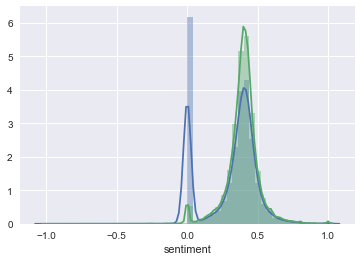

In [75]:
#Sentiment distribution

sns.distplot(df_listings_new_sent.sentiment.fillna(value=0));

sns.distplot(df_listings_new_sent.sentiment[df_listings_new_sent.sentiment.notnull()]);

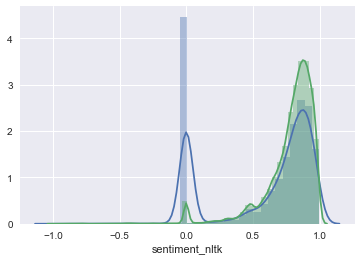

In [76]:
#Sentiment distribution nltk

sns.distplot(df_listings_new_sent.sentiment_nltk.fillna(value=0));

sns.distplot(df_listings_new_sent.sentiment_nltk[df_listings_new_sent.sentiment_nltk.notnull()]);

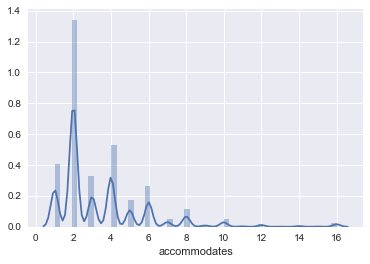

In [77]:
sns.distplot(df_listings_new_sent.accommodates);

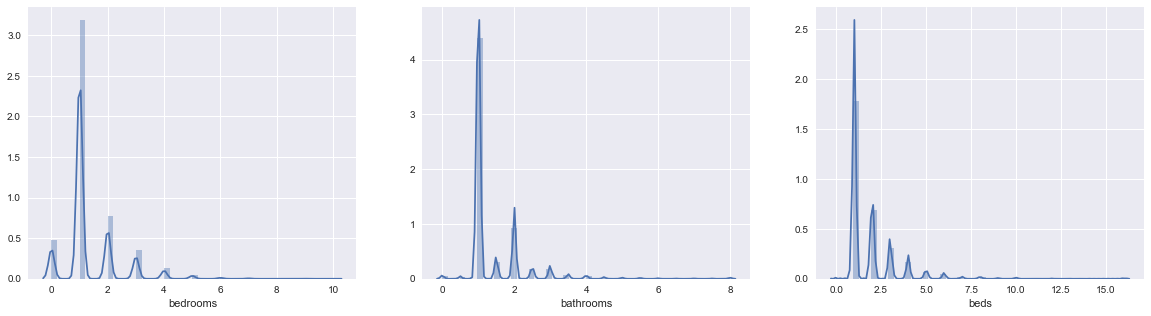

In [78]:
#bedrooms, bathrooms and beds

f, axes = plt.subplots(1, 3,figsize=(20,5))

sns.distplot(df_listings_new_sent.bedrooms.fillna(value=0),ax=axes[0]);

sns.distplot(df_listings_new_sent.bathrooms.fillna(value=0),ax=axes[1]);

sns.distplot(df_listings_new_sent.beds.fillna(value=0),ax=axes[2]);

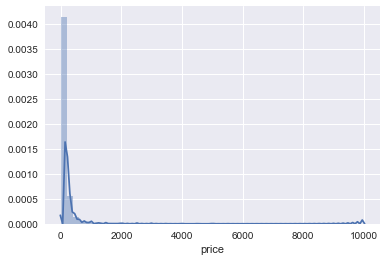

In [79]:
#Price

sns.distplot(df_listings_new_sent.price.fillna(value=0));

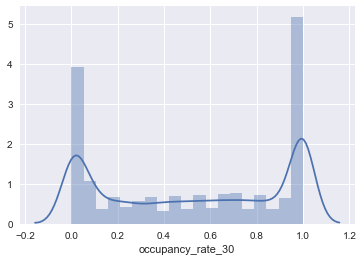

In [80]:
#Occupancy rate

sns.distplot(df_listings_new_sent.occupancy_rate_30.fillna(value=0));

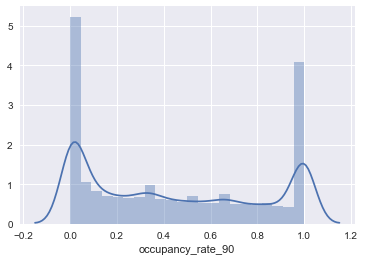

In [81]:
#Occupancy rate

sns.distplot(df_listings_new_sent.occupancy_rate_90.fillna(value=0));

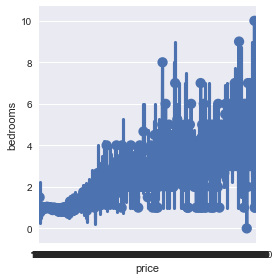

In [82]:
#Check price and number of bedrooms

sns.factorplot(x='price',y='bedrooms',data=df_listings_new_sent,kind='point')

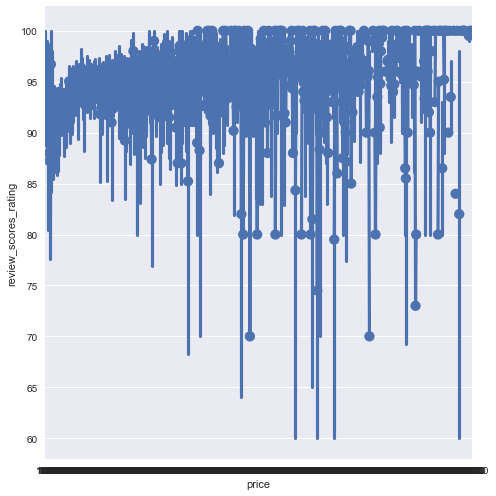

In [83]:
#Check price and reviews score

sns.factorplot(x='price',y='review_scores_rating',data=df_listings_new_sent,kind='point',size=7)

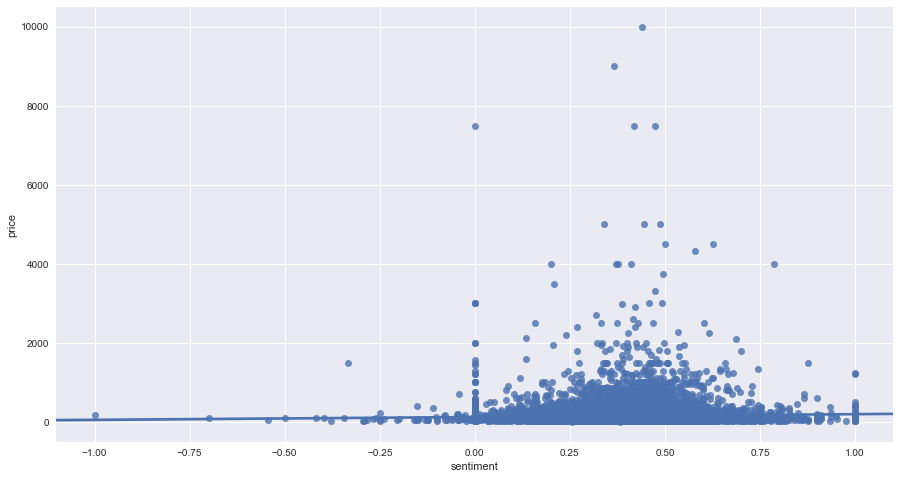

In [84]:
#Check sentiment and price

p=sns.regplot(x='sentiment',y='price',data=df_listings_new_sent)
p.figure.set_size_inches(15, 8)
sns.despine()

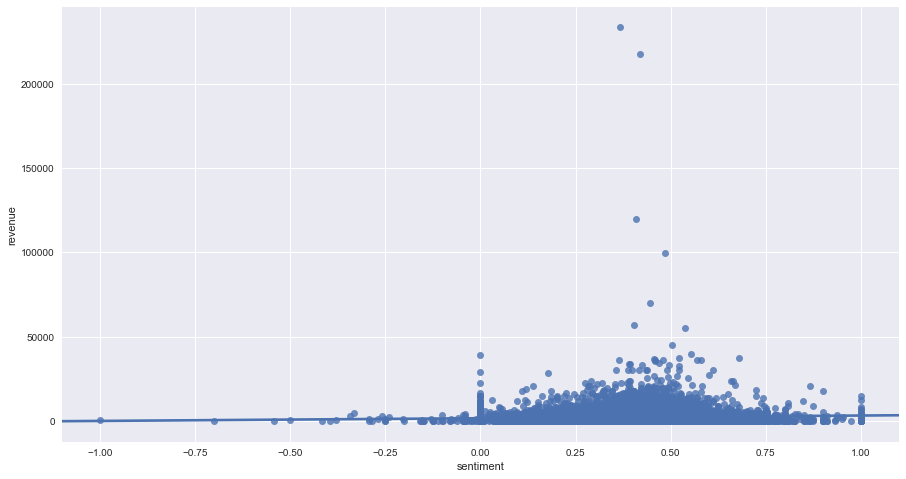

In [85]:
#Check sentiment and revenue

p=sns.regplot(x='sentiment',y='revenue',data=df_listings_new_sent_am)
p.figure.set_size_inches(15, 8)
sns.despine()

# 3. Classification

In order to understand what are the most important features to determine if a listing is successful or not, we will train a classifier to get which features are more important to build the tree.

## 3.1 Preparing data for classification

We will use the following features to predict if the listing is successful or not:

 - host_is_superhost
 - property_type
 - room_type
 - bedrooms
 - bed_type
 - number_of_reviews
 - review_scores_rating
 - cancellation_policy
 - sentiment_nltk
 - request_deposit
 - clean_perc
 
As well as dummies for all the amenities: 24-hour check-in, Air conditioning and 88 more.

In [86]:
##Read the data processed before
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("listings_new_sent_am.csv")

In [87]:
##We will keep the following variables:

keep=['revenue','host_is_superhost','property_type','room_type','bedrooms','bed_type','number_of_reviews',
     'review_scores_rating','cancellation_policy','sentiment_nltk','host_has_profile_pic','host_identity_verified',
     'bathrooms','beds','require_guest_profile_picture','require_guest_phone_verification','request_deposit',
     'clean_perc']

##Check nas

nulls={}
for feat in keep:
    nulls[feat]=df[feat].isnull().sum()*1.0/len(df[feat])
    
nulls

{'bathrooms': 0.003103702044603718,
 'bed_type': 0.0,
 'bedrooms': 0.0011198924903209292,
 'beds': 0.0018878187693981377,
 'cancellation_policy': 0.0,
 'clean_perc': 0.0,
 'host_has_profile_pic': 0.0,
 'host_identity_verified': 0.0,
 'host_is_superhost': 0.0,
 'number_of_reviews': 0.0,
 'property_type': 0.0,
 'request_deposit': 0.0,
 'require_guest_phone_verification': 0.0,
 'require_guest_profile_picture': 0.0,
 'revenue': 0.0,
 'review_scores_rating': 0.24084087927558953,
 'room_type': 0.0,
 'sentiment_nltk': 0.2311138130739449}

In [88]:
##First check bedrooms: 35 records with no value in bedroom. We will
##remove this records from the dataset

df[df.bedrooms.isnull()][['id','room_type','bed_type','bedrooms','beds']]
len(df[df.bedrooms.isnull()])


##Keep just records with not null values in bedrooms.

df2 = df[df.bedrooms.notnull()]

##Check

len(df)-len(df2)

id        room_type  bed_type  bedrooms  beds
900     1237815  Entire home/apt  Real Bed       NaN   1.0
909     1698049  Entire home/apt  Real Bed       NaN   1.0
1383   17860823     Private room  Real Bed       NaN   NaN
2925   17624607     Private room  Real Bed       NaN   NaN
3637     106052  Entire home/apt  Real Bed       NaN   1.0
5185   16811843     Private room  Real Bed       NaN   NaN
5874    2095010  Entire home/apt  Real Bed       NaN   NaN
7536   16929053     Private room  Real Bed       NaN   NaN
7661    1758811  Entire home/apt  Real Bed       NaN   2.0
8854     101702  Entire home/apt  Real Bed       NaN   1.0
9755   17767757     Private room  Real Bed       NaN   NaN
9856      61582  Entire home/apt  Real Bed       NaN   1.0
11090     47078  Entire home/apt  Real Bed       NaN   1.0
13236   1264019  Entire home/apt     Futon       NaN   1.0
17873   2764782  Entire home/apt  Real Bed       NaN   1.0
18393  13081900  Entire home/apt  Real Bed       NaN   1.0
21952   2146019  Entire home/apt  Real Bed       NaN   NaN
23031   7365783  Entire home/apt  Real Bed       NaN   2.0
23745  17075436     Private room  Real Bed       NaN   NaN
23865   1990067  Entire home/apt  Real Bed       NaN   1.0
24044   1216507  Entire home/apt  Real Bed       NaN   1.0
24638  12129435  Entire home/apt  Real Bed       NaN   NaN
25257  16454361     Private room  Real Bed       NaN   NaN
25636   6661227  Entire home/apt  Real Bed       NaN   NaN
25733    928057  Entire home/apt  Real Bed       NaN   1.0
25803   7637980  Entire home/apt  Real Bed       NaN   1.0
26356  12130232  Entire home/apt  Real Bed       NaN   NaN
26533    708726  Entire home/apt  Real Bed       NaN   2.0
26593     17860  Entire home/apt  Real Bed       NaN   1.0
26881    497390  Entire home/apt  Real Bed       NaN   1.0
28047      8770  Entire home/apt  Real Bed       NaN   1.0
28551  17479483     Private room  Real Bed       NaN   NaN
28948    669808  Entire home/apt  Real Bed       NaN   1.0
29843   1365296  Entire home/apt  Real Bed       NaN   1.0
31235   1312618  Entire home/apt  Real Bed       NaN   1.0

35

35

In [89]:
#Change 0 bedrooms to 1

df2.bedrooms = df2.bedrooms.apply(lambda x: 1 if x==0 else x)


In [90]:
##Now lets work on review_score_rating and sentiment.
##We will fill nulls.

df2.review_scores_rating = df2.review_scores_rating.fillna(value=0)
df2.sentiment_nltk = df2.sentiment_nltk.fillna(value=0)
df2.bathrooms = df2.bathrooms.fillna(value=df2.bathrooms.mean())
df2.beds = df2.beds.fillna(value=df2.beds.mean())

In [91]:

nulls={}
for feat in keep:
    nulls[feat]=df2[feat].isnull().sum()*1.0/len(df2[feat])
    
nulls

{'bathrooms': 0.0,
 'bed_type': 0.0,
 'bedrooms': 0.0,
 'beds': 0.0,
 'cancellation_policy': 0.0,
 'clean_perc': 0.0,
 'host_has_profile_pic': 0.0,
 'host_identity_verified': 0.0,
 'host_is_superhost': 0.0,
 'number_of_reviews': 0.0,
 'property_type': 0.0,
 'request_deposit': 0.0,
 'require_guest_phone_verification': 0.0,
 'require_guest_profile_picture': 0.0,
 'revenue': 0.0,
 'review_scores_rating': 0.0,
 'room_type': 0.0,
 'sentiment_nltk': 0.0}

## 3.2 Preparing X and y

In [92]:
y=df2.is_successful_c

In [93]:

len(am_list)
am_list2=np.delete(am_list,[91])
am_list2=np.delete(am_list2,[90])

keep_final = keep + am_list2.tolist()

keep_final

X = df2[keep_final]

92

['revenue',
 'host_is_superhost',
 'property_type',
 'room_type',
 'bedrooms',
 'bed_type',
 'number_of_reviews',
 'review_scores_rating',
 'cancellation_policy',
 'sentiment_nltk',
 'host_has_profile_pic',
 'host_identity_verified',
 'bathrooms',
 'beds',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'request_deposit',
 'clean_perc',
 '24-hour check-in',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bathtub',
 'Bed linens',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children\xe2\x80\x99s books and toys',
 'Children\xe2\x80\x99s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'EV charger',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',

In [94]:
X = pd.get_dummies(X)

In [95]:
X.columns.tolist()

['revenue',
 'host_is_superhost',
 'bedrooms',
 'number_of_reviews',
 'review_scores_rating',
 'sentiment_nltk',
 'host_has_profile_pic',
 'host_identity_verified',
 'bathrooms',
 'beds',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'request_deposit',
 'clean_perc',
 '24-hour check-in',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bathtub',
 'Bed linens',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children\xe2\x80\x99s books and toys',
 'Children\xe2\x80\x99s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'EV charger',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'First aid kit',
 'Free 

In [96]:
X = X.drop(['revenue'],axis=1)

In [97]:
X.head()

host_is_superhost  bedrooms  number_of_reviews  review_scores_rating  \
0                0.0       5.0                  0                   0.0   
1                1.0       1.0                 33                  93.0   
2                1.0       1.0                 14                 100.0   
3                1.0       1.0                 22                 100.0   
4                0.0       1.0                  3                  93.0   

   sentiment_nltk  host_has_profile_pic  host_identity_verified  bathrooms  \
0        0.000000                   1.0                     0.0        7.0   
1        0.814103                   1.0                     0.0        1.0   
2        0.893307                   1.0                     1.0        1.0   
3        0.885386                   1.0                     0.0        1.0   
4        0.905900                   1.0                     1.0        1.0   

   beds  require_guest_profile_picture                 ...                   \
0   5.0                            0.0                 ...                    
1   1.0                            0.0                 ...                    
2   1.0                            0.0                 ...                    
3   3.0                            0.0                 ...                    
4   1.0                            0.0                 ...                    

   bed_type_Airbed  bed_type_Couch  bed_type_Futon  bed_type_Pull-out Sofa  \
0                0               0               0                       0   
1                0               0               0                       0   
2                0               0               0                       0   
3                0               0               0                       0   
4                0               0               0                       0   

   bed_type_Real Bed  cancellation_policy_flexible  \
0                  1                             0   
1                  1                             1   
2                  1                             1   
3                  1                             1   
4                  1                             1   

   cancellation_policy_moderate  cancellation_policy_strict  \
0                             0                           1   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   

   cancellation_policy_super_strict_30  cancellation_policy_super_strict_60  
0                                    0                                    0  
1                                    0                                    0  
2                                    0                                    0  
3                                    0                                    0  
4                                    0                                    0  

[5 rows x 126 columns]

In [98]:
##Check dimensions

y.shape
X.shape

(31218L,)

(31218, 126)

## 3.3 Fit Classifier

We will fit a Decission Tree and a Random Forest to then pick the best model in order the understand the main features used by the tree to determine if a listing is succesful or not

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [100]:
## Create train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [101]:
## List of classifiers

clfs = [DecisionTreeClassifier(random_state=0), RandomForestClassifier(n_jobs=-1)]

In [102]:
## Parameters for crossvalidation

nfolds = 10
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)

In [103]:
## Fit classifiers to get the best one

maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = cross_val_score(cl,X,y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best') 0.5452634584748824
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 0.608416320878973
***********************************************
Best is... RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
       

Random Forest performs better so we we will try to tune this model to improve performance and then get the list of the most important features to build the tree.

## 3.4 Random Forest classifier

Now we will work with the Random Forest calssifier to find the best parameters possible and then to find the most important features after we train the classifier

<b><i>CAUTION: GRID SEARCH EXECUTION MAY TAKE A LONG TIME</i></b>

In [106]:
##Grid search to find the best parameters

from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": [2,4,6,8,10,12,None]
            ,"criterion": ('gini','entropy')
            ,"min_samples_split" :[2,3,4,5,6]
             ,"min_samples_leaf": [1,2,3,4,5]}
            

rf_regr = RandomForestClassifier()
model = GridSearchCV(rf_regr,parameters, n_jobs = -1, cv = 10)
model_fit = model.fit(X_train,y_train)

learned_parameters = model_fit.best_params_

In [107]:
learned_parameters

y_pred2 = model_fit.predict(X_test)

print "Train Accuracy :: ", accuracy_score(y_train, model_fit.predict(X_train))
print "Test Accuracy  :: ", accuracy_score(y_test, y_pred2)

confusion_matrix(y_test, y_pred2)
#f1_score(y_test, y_pred2, average='macro')

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 6}

Train Accuracy ::  0.7992712420917755
Test Accuracy  ::  0.6105060858424087


array([[2938,  753],
       [1679,  874]])

Train the model with the best parameters as a reference:

In [108]:
rf = RandomForestClassifier(criterion= 'gini',
                             max_depth= 12,
                             min_samples_leaf= 3,
                             min_samples_split= 2,
                             random_state = 0)

In [109]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [110]:
y_pred = rf.predict(X_test)

In [111]:
print "Train Accuracy :: ", accuracy_score(y_train, rf.predict(X_train))
print "Test Accuracy  :: ", accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

Train Accuracy ::  0.6926803876031072
Test Accuracy  ::  0.612427930813581


array([[3174,  517],
       [1903,  650]])

In [112]:
nfolds=10
kf=KFold(n_splits=nfolds,random_state=0,shuffle=True)

In [113]:
cross_val_score(rf,X,y, cv=kf,n_jobs=-1,scoring='roc_auc').mean()

0.6382052752090743

Now we will check the most important features:

In [114]:
##Check the importance of the features

feat = zip(X_train.columns,rf.feature_importances_)

important_features = pd.DataFrame(list(feat), columns =['feature','importance'])

important_features.sort_values(by=['importance'],ascending= False)

feature  importance
12                            clean_perc    0.103968
4                         sentiment_nltk    0.090037
2                      number_of_reviews    0.074125
3                   review_scores_rating    0.059474
8                                   beds    0.033664
38                                 Dryer    0.026262
7                              bathrooms    0.020725
115                room_type_Shared room    0.020497
63                               Kitchen    0.019698
14                      Air conditioning    0.018128
1                               bedrooms    0.017883
23                              Cable TV    0.015827
103              property_type_Apartment    0.015501
95                                    TV    0.014745
123           cancellation_policy_strict    0.013889
113            room_type_Entire home/apt    0.013859
97                                Washer    0.013759
6                 host_identity_verified    0.013493
94                   Suitable for events    0.012532
60                              Internet    0.012527
108                  property_type_House    0.012437
40                  Elevator in building    0.012075
90                        Smoke detector    0.011341
121         cancellation_policy_flexible    0.011299
11                       request_deposit    0.010800
87                               Shampoo    0.010717
48              Free parking on premises    0.010633
53                            Hair dryer    0.010498
13                      24-hour check-in    0.010465
44                   Family/kid friendly    0.010089
..                                   ...         ...
72                                  Oven    0.000072
31                        Cooking basics    0.000000
29              Cleaning before checkout    0.000000
15                             BBQ grill    0.000000
30                          Coffee maker    0.000000
88                     Single level home    0.000000
67               Long term stays allowed    0.000000
33                 Dishes and silverware    0.000000
34                            Dishwasher    0.000000
51                    Garden or backyard    0.000000
49                Free parking on street    0.000000
39                            EV charger    0.000000
124  cancellation_policy_super_strict_30    0.000000
58                             Hot water    0.000000
17                          Baby monitor    0.000000
68               Luggage dropoff allowed    0.000000
69                             Microwave    0.000000
74             Paid parking off premises    0.000000
75                      Patio or balcony    0.000000
26                        Changing table    0.000000
78                           Pocket wifi    0.000000
101                        Window guards    0.000000
100               Wide hallway clearance    0.000000
80                      Private bathroom    0.000000
83                          Refrigerator    0.000000
96                   Table corner guards    0.000000
20                            Bed linens    0.000000
43            Extra pillows and blankets    0.000000
93                                 Stove    0.000000
42                   Ethernet connection    0.000000

[126 rows x 2 columns]

# 4. Findings

## 4.1 Amenities

<b/>Summary</b>: Having Kitchen, Washer and Dryer increases the chances of success.

In this section we will answer the question of what are the most important amenities to become a succesful Airbnb listing.

We will explore the 20 most important amenities according to the Random Forest classifier that we trained.

### 4.1.1 Validate finding

#### Most important amenities

In [115]:
##Check the most important amenities

important_amenities=important_features[important_features.isin(am_list2.tolist())['feature']].sort_values(by=['importance'],
                                                                                     ascending=False)

##Get those with importance higher than zero

important_amenities = important_amenities[important_amenities.importance>0]

important_amenities

feature  importance
38                        Dryer    0.026262
63                      Kitchen    0.019698
14             Air conditioning    0.018128
23                     Cable TV    0.015827
95                           TV    0.014745
97                       Washer    0.013759
94          Suitable for events    0.012532
60                     Internet    0.012527
40         Elevator in building    0.012075
90               Smoke detector    0.011341
87                      Shampoo    0.010717
48     Free parking on premises    0.010633
53                   Hair dryer    0.010498
13             24-hour check-in    0.010465
44          Family/kid friendly    0.010089
61                         Iron    0.010048
21                    Breakfast    0.009966
54                      Hangers    0.009895
45            Fire extinguisher    0.009847
47                First aid kit    0.009831
41                   Essentials    0.009220
64    Laptop friendly workspace    0.009166
65         Lock on bedroom door    0.008982
77   Pets live on this property    0.008913
59             Indoor fireplace    0.008625
76                 Pets allowed    0.008411
79                         Pool    0.008122
24     Carbon monoxide detector    0.008047
35                       Dog(s)    0.007791
52                          Gym    0.007596
..                          ...         ...
85                  Safety card    0.006743
57                      Hot tub    0.006307
25                       Cat(s)    0.006307
86                Self Check-In    0.006288
91              Smoking allowed    0.005923
66                      Lockbox    0.005412
81             Private entrance    0.005235
99        Wheelchair accessible    0.005094
102           Wireless Internet    0.004231
62                       Keypad    0.002774
19                      Bathtub    0.002545
36                      Doorman    0.002404
89                    Smartlock    0.001902
82          Private living room    0.001447
37                Doorman Entry    0.001051
73     Pack ’n Play/travel crib    0.001011
84        Room-darkening shades    0.000776
50                 Game console    0.000642
56                   High chair    0.000618
18   Babysitter recommendations    0.000590
46             Fireplace guards    0.000510
70                 Other pet(s)    0.000492
27    Children’s books and toys    0.000410
32                         Crib    0.000383
16                    Baby bath    0.000308
71                Outlet covers    0.000206
92                  Stair gates    0.000150
98               Washer / Dryer    0.000113
28        Children’s dinnerware    0.000084
72                         Oven    0.000072

[62 rows x 2 columns]

#### Amenities importance and success rate

In [116]:
##Initialize the data frame

success_amenities = pd.DataFrame(columns=['amenitie','False','True'])

In [117]:
##Get the 20 most important amenities

n = 20

list_20 =important_amenities.feature[0:n].tolist()

##Calculate the diference in revenue for each amenitie

var = 'is_successful_c'

for am in list_20:
    
    sub_df = df2.groupby(am,as_index=False)[var].mean().T
    append_df = pd.DataFrame([[am, sub_df.values[1][0], sub_df.values[1][1]]], 
                             columns=['amenitie','False','True'])
    
    success_amenities = success_amenities.append(append_df)

    
success_amenities['% var.']=((success_amenities.True-success_amenities.False)*1.0/success_amenities.False)*100

Populating the interactive namespace from numpy and matplotlib


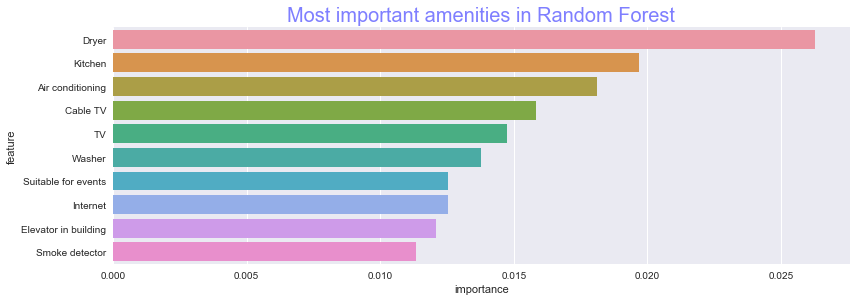

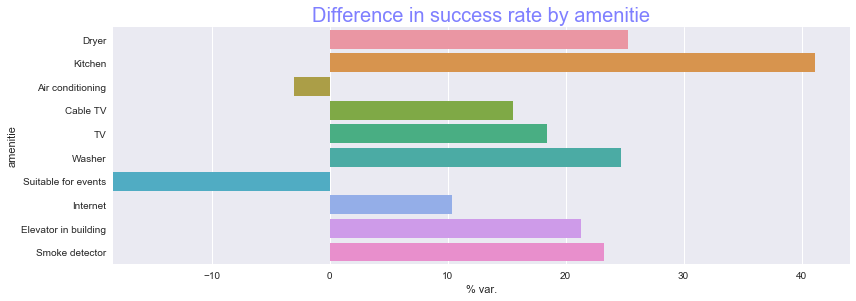

In [118]:
# Plot important amenities and successful rate

import seaborn as sns
%pylab inline

p1=sns.factorplot(x='importance', y='feature', data=important_amenities[0:10], kind='bar',aspect=3);
p1.ax.set_title('Most important amenities in Random Forest',fontsize=20,color="b",alpha=0.5);

p2=sns.factorplot(x='% var.', y='amenitie', data=success_amenities.head(10)
               , kind='bar',aspect=3);
p2.ax.set_title('Difference in success rate by amenitie',fontsize=20,color="b",alpha=0.5);

Based on the first plot we can say that Dryer, Kitchen, Cable TV, Elevator, Air conditiing and Washer are the most important amenities to define the success of a listing.

If we look at the second one, we can see that those listings that include Dryer, Kitchen and Washer are the ones with the highest difference in success rate. We can observe that the proportion of succeful listings having Kitchen is more than 40% higher than the proportion of succesful listings not having Kitchen. Similarly, the differnce for listings including Dryer is around 25% and for the listings including Washer is also around 25%.

Suprinsigly, the proportion of succesful listings including Air conditioning is 3% less than those listings including Air conditioning.

Now, let's see what happens with those listings that have Kitchen + Washer + Dryer, or Washer + Dryer or just Washer compared to those that does not include the corresponding combination:

In [119]:
combo_df= pd.DataFrame(columns=['Combo','False','True'])

c1_t=df[((df.Dryer==1) & (df.Kitchen==1) & (df.Washer==1))]['is_successful_c'].mean()
c1_f=df[((df.Dryer==0) & (df.Kitchen==0) & (df.Washer==0))]['is_successful_c'].mean()

combo_df = combo_df.append(pd.DataFrame([['Kitchen + Washer + Dryer',c1_f,c1_t]],columns=['Combo','False','True']))

c2_t=df[(df.Dryer==1) & (df.Washer==1)]['is_successful_c'].mean()
c2_f=df[(df.Dryer==0) & (df.Washer==0)]['is_successful_c'].mean()

combo_df = combo_df.append(pd.DataFrame([['Washer + Dryer',c2_f,c2_t]],columns=['Combo','False','True']))

c3_t=df[df.Washer==1]['is_successful_c'].mean()
c3_f=df[df.Washer==0]['is_successful_c'].mean()

combo_df = combo_df.append(pd.DataFrame([['Washer',c3_f,c3_t]],columns=['Combo','False','True']))

combo_df['% var.'] = ((combo_df.True-combo_df.False)/combo_df.False)*100

combo_df                                                         

Combo     False      True     % var.
0  Kitchen + Washer + Dryer  0.280672  0.442154  57.533881
0            Washer + Dryer  0.347309  0.437827  26.062698
0                    Washer  0.349365  0.436389  24.909258

We can see that the proportion of successful listings increase in 57.53% for those listings that include Kitchen + Washer + Dryer compared to those that do not have any of those amenities.

It is interesting to note that the proportion of successful listings increase in 26.06% for those listings that include Washer + Dryer compared to those that do not include those amenities. These amenities are easy to install and inexpensive and could be a way to imporve the chances of being succesful. 

### 4.1.2 Managerial Insight

Based on our results we can recommend the following:

- For those that are interested in entering into the Airbnb rental business, having Kitchen, Washer and Dryer or Washer and Dryer, is an important factor for the success of the business.

- For those that are already in the business and don't have those amenities, check the factibility of installing all or some of them. 

### 4.1.3 Machine Learning

We leverage on machine learning tools to be able to identify the most important amenities. Our approach was:

- Train a Decission Tree and a Random Forest to pick the best model. In this case Random Forest performed better.
- Perfrom a Grid Search in order to find the best parameters for our Random Forest classifier
- Train the Random Forest classifier with best parameters
- Get the list of the most important features used by the Random Forest
- Select features associated with amenities with importance higher than 0

## 4.2 Sentiment

<b/>Summary:</b> Not having reviews is not a problem at all

In this section we will explore how sentiments associated to reviews are related to success.

### 4.2.1 Validate finding

When we trained the Random Forest Classifier we could see that sentiment_nltk was an important feature in the tree, that give us a clue that we could find some finding relating sentiment and success.

In [120]:
##Check sentiment

df3 = df2

## Create bins for sentiment in order to plot

df3['sentiment_bin'] = pd.cut(df3['sentiment_nltk'], [-1, -0.001,.25, 0.5, 0.75, 1])

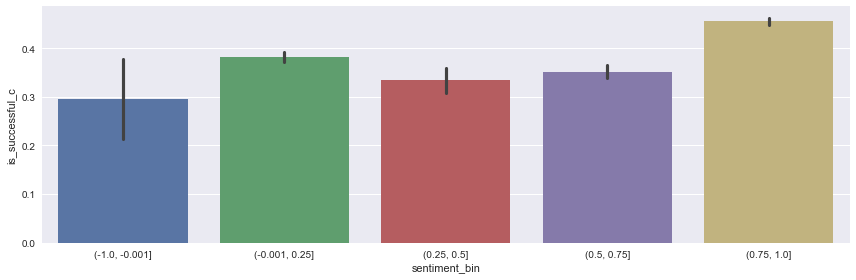

In [121]:
sns.factorplot(x='sentiment_bin',y='is_successful_c',data=df3,kind='bar',aspect=3)

Based on this we can conclude:

- Listings with negative average sentiment reviews are definitely less likely to be successful
- Listings with strong average positive sentiment are definitely more likely to be successful
- What is happening with the (-0.001 0.25] bin ?:
    - 97% of the listings in this category does not have any reviews
    - The surprising thing is that based on this data, listings without reviews are more likely to be sucessful than those that has a moderate positive sentiment 

### 4.2.2 Managerial Insight

Unless Airbnb hosts are pretty sure that they will get strongly positive reviews, not having reviews is not a problem at all. This is helpful to all those hosts that might think that not having reviews could hurt their chances of success. Therefore, reviews should be encouraged by hosts only if they are confident that guests will write very good reviews.

### 4.1.3 Machine Learning

The sentiment score used as a feature in our analysis, was obtained using a machine learning library for natural language processing called nltk. Using this library we were able to process each review and to get and average sentiment score for each listing. 

Then, using the same approach explained in the previous finding, we noticed that sentiment was an important feature for our classifier and therefore we should explore the relationship between sentiment and success rate. 

## 4.3 Location

<b/>Summary</b>: If you are interested in entering into the Airbnb business or if you want to expand your Airbnb business, look for Sunset Park and Playa del Rey area.

In this section we will explore what locations might be good to run an Airbnb listing.

### 4.3.1 Validate finding

#### Clustering to find the most competitive places

In [122]:
from sklearn.cluster import KMeans

In [123]:
# Select listings with not null values in review score ratings

df_c = df2[df2.review_scores_rating.notnull()]

In [124]:
# Create the new variable number of amenities to use it for clustering

df_c['number_amenities']=df_c.loc[:,'24-hour check-in':'Wireless Internet'].sum(axis=1)

df_c.number_amenities.head()

0    25
1     0
2    13
3    22
4     9
Name: number_amenities, dtype: int64

In [125]:
# Define the variables that will be kept for clustering

keep_c=['bedrooms','price','occupancy_rate_30','review_scores_rating','number_amenities']

In [126]:
# Define the new data frame for clustering

new_df=df_c[keep_c]

In [127]:
# Initialize the clustering model

clus = KMeans(n_clusters=20,n_jobs=-1,random_state=0)

In [128]:
# Fit the data

clus.fit(new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [129]:
# Create the column 'labels' to store the results of clustering

new_df['labels']=clus.labels_

In [130]:
# Check clusters to find those clusters with highest occupancy rate and highest rating scores

new_df.groupby('labels').mean()

bedrooms        price  occupancy_rate_30  review_scores_rating  \
labels                                                                   
0       2.705682   374.757955           0.449811             82.517045   
1       4.137931  4919.034483           0.275862             17.241379   
2       1.153743   106.413586           0.595574             94.647404   
3       5.250000  9958.291667           0.176389              8.333333   
4       4.388235  1900.247059           0.193333             33.117647   
5       3.438462   965.657692           0.318846             51.346154   
6       4.655172  3854.137931           0.197701             23.931034   
7       4.444444  7263.333333           0.185185             22.111111   
8       1.044687    57.089374           0.474619              0.533779   
9       1.628081   191.921758           0.472883              0.364416   
10      2.283970   258.877389           0.510067             95.099788   
11      1.025060    56.542530           0.544390             93.838675   
12      3.386667   724.740000           0.408000             61.370000   
13      1.591750   169.412755           0.553043             94.664770   
14      3.894737  1367.450292           0.250487             44.058480   
15      4.169811  2440.792453           0.201258             24.981132   
16      3.104972   514.425414           0.460451             63.383978   
17      4.027778  3005.250000           0.143519             13.250000   
18      1.172071   115.901427           0.487505              0.296152   
19      2.127559   289.607874           0.443255              0.157480   

        number_amenities  
labels                    
0              20.718182  
1              16.862069  
2              18.170559  
3              13.833333  
4              20.105882  
5              19.992308  
6              19.275862  
7              21.000000  
8              13.425757  
9              16.828510  
10             20.799894  
11             15.982169  
12             19.986667  
13             19.568516  
14             19.982456  
15             18.339623  
16             20.154696  
17             19.027778  
18             15.113273  
19             17.423622

In [131]:
# Include more variables to plot

keep3=['is_successful_c','latitude','longitude','property_type','room_type','bedrooms','bathrooms','beds','bed_type','cancellation_policy','host_has_profile_pic','host_identity_verified',
     'require_guest_profile_picture','request_deposit'
     ]

In [132]:
# Define the new data frame with more variables

X3 = df_c[keep3]

In [133]:
# Include labels from clustering

X3['cluster']=clus.labels_

#### Exploring LA

We will use the library 'plotly' to visualize the listings. This library can be installed from Canopy prompt with the command: pip install plotly

In [134]:
import plotly.plotly as py
from plotly.graph_objs import *

We will plot a quick overview of the listings, each color is a different cluster

In [142]:
# Overview of listings

mapbox_access_token = 'pk.eyJ1IjoicHJvZGlsbG8iLCJhIjoiY2plc3cxbWJnMGVsbzJ3bXBidHJkOGRhYSJ9.LxiLCXUBQwVDiCePYR2MvQ'

data = Data([
    Scattermapbox(
        lat=X3.latitude,
        lon=X3.longitude,
        mode='markers',
        marker=Marker(
            size=2.5,
            color =X3['cluster'],
            colorscale= 'Jet'
        ),
        text=X3.cluster,
    )
])
layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=34.052235,
            lon=-118.243683
        ),
        pitch=0,
        zoom=8.5
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

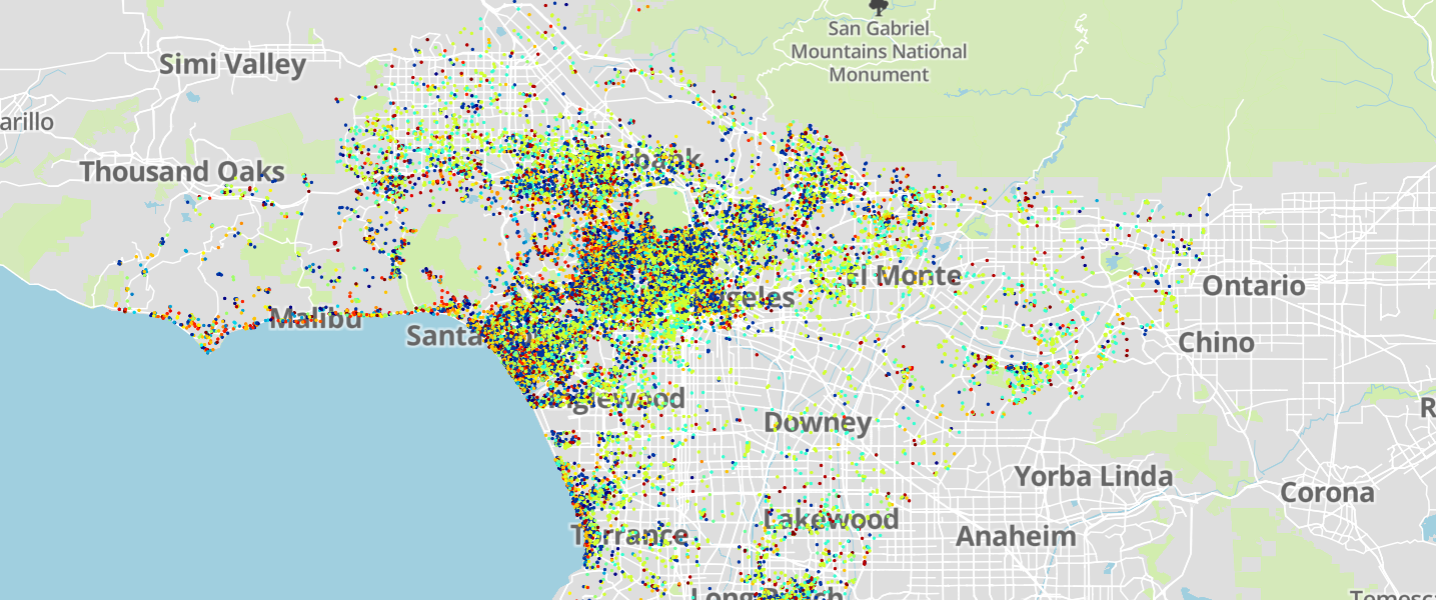

In [146]:
# Load image in case of problems loading the interactive map

from IPython.display import Image
Image("Listings_clsutered.png")

Based on the clustering results, we identified the clusters 2, 10, 11 and 13 as clusters with a high average occupancy rate (above 50%) and high rating score (above 90). Also we identified clusters 8 and 18 as clusters that in average have good occupancy rates, are low priced, but most of them don't have rating scores. In order to visualize these cluster, we will define the variable <b>'most_competitive'</b> to identify listings that belong to those clusters.

- Listings belonging to to clusters 2, 10, 11 and 13 will take the value of 1
- Listings belonging to to clusters 8 and 18 will take the value of 0.5
- All other listings will take the value of zero

Zones with a high concentration of listings belonging to the clusters mentioned before, will be considered as highly competitive areas and the objective of the plots that will come later is to visualize those areas in order to find good potential places to locate an Airbnb listing.

In [136]:
X3['most_competitive']=((X3.cluster==2) | (X3.cluster==10) | (X3.cluster==11) | (X3.cluster==13))*1.0
X3['most_competitive']=X3['most_competitive']+((X3.cluster==8) | (X3.cluster==18))*0.5
#X3.most_competitive=X3.cluster.apply(lambda x: 0.5 if x==13 else x)
X3.head()

is_successful_c   latitude   longitude property_type        room_type  \
0              0.0  34.530350 -118.227088         House  Entire home/apt   
1              0.0  34.485431 -118.125380         Other     Private room   
2              0.0  34.510130 -118.212407         House     Private room   
3              1.0  34.515486 -118.230742         Other  Entire home/apt   
4              0.0  34.031419 -118.299016     Apartment     Private room   

   bedrooms  bathrooms  beds  bed_type cancellation_policy  \
0       5.0        7.0   5.0  Real Bed              strict   
1       1.0        1.0   1.0  Real Bed            flexible   
2       1.0        1.0   1.0  Real Bed            flexible   
3       1.0        1.0   3.0  Real Bed            flexible   
4       1.0        1.0   1.0  Real Bed            flexible   

   host_has_profile_pic  host_identity_verified  \
0                   1.0                     0.0   
1                   1.0                     0.0   
2                   1.0                     1.0   
3                   1.0                     0.0   
4                   1.0                     1.0   

   require_guest_profile_picture  request_deposit  cluster  most_competitive  
0                            0.0             True       17               0.0  
1                            0.0            False       11               1.0  
2                            0.0            False       11               1.0  
3                            0.0            False       13               1.0  
4                            0.0            False       11               1.0

The next plot gives an overview of the listings in our dataset, Red and Green dots identify competitive areas. Looking at the map we can see how competitive is the Airbnb business in LA.

In [143]:
mapbox_access_token = 'pk.eyJ1IjoicHJvZGlsbG8iLCJhIjoiY2plc3cxbWJnMGVsbzJ3bXBidHJkOGRhYSJ9.LxiLCXUBQwVDiCePYR2MvQ'

data = Data([
    Scattermapbox(
        lat=X3.latitude,
        lon=X3.longitude,
        mode='markers',
        marker=Marker(
            size=2.5,
            color =X3['most_competitive'],
            colorscale= 'Jet'#'YlOrRd'
        ),
        text=[],
    )
])
layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=34.052235,
            lon=-118.243683
        ),
        pitch=0,
        zoom=8.5
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

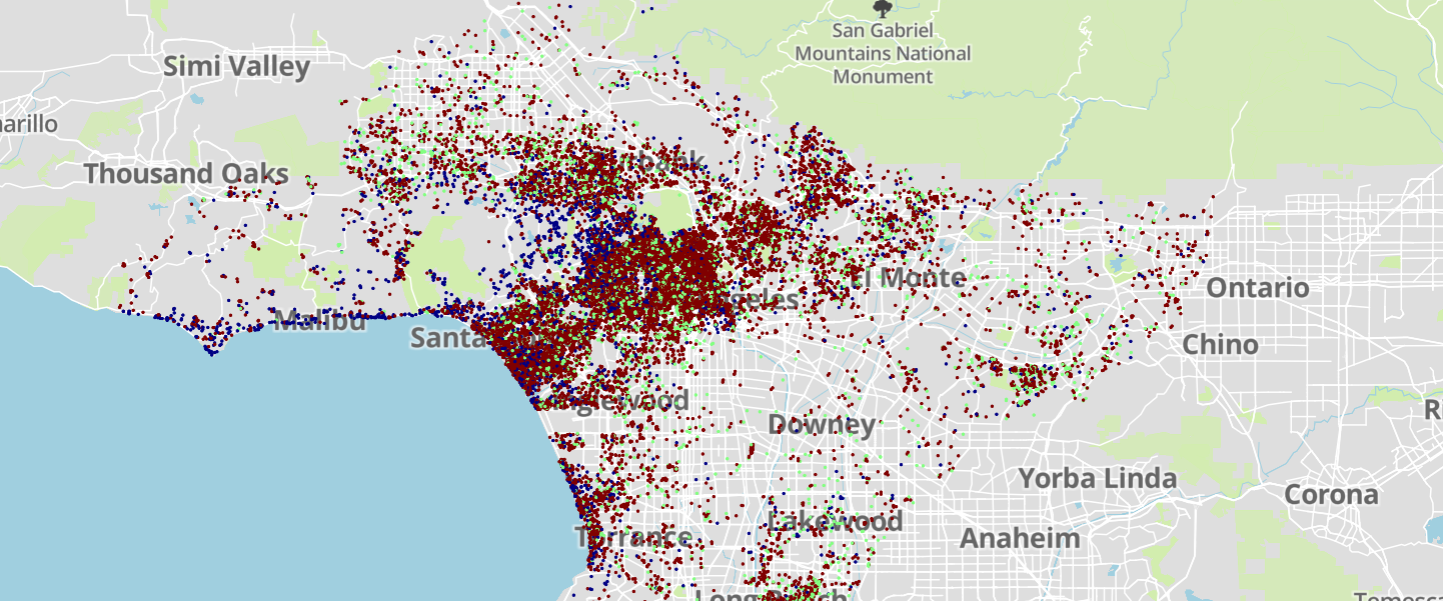

In [147]:
# Load image in case of problems loading the interactive map

Image("LA_overview.png")

Exploring the map, we noticed that surprinsigly there is an area in Santa Monica called Sunset Park, close to the airport, and close to Ocean Park, that is less dense in terms of the competitive listings available and therefore could be a good area to run an Airbnb listing.

In [144]:
mapbox_access_token = 'pk.eyJ1IjoicHJvZGlsbG8iLCJhIjoiY2plc3cxbWJnMGVsbzJ3bXBidHJkOGRhYSJ9.LxiLCXUBQwVDiCePYR2MvQ'

data = Data([
    Scattermapbox(
        lat=X3.latitude,
        lon=X3.longitude,
        mode='markers',
        marker=Marker(
            size=4,
            color =X3['most_competitive'],
            colorscale= 'Jet'#'YlOrRd'
        ),
        text=[],
    )
])
layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=34.00,
            lon=-118.45
        ),
        pitch=0,
        zoom=12
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

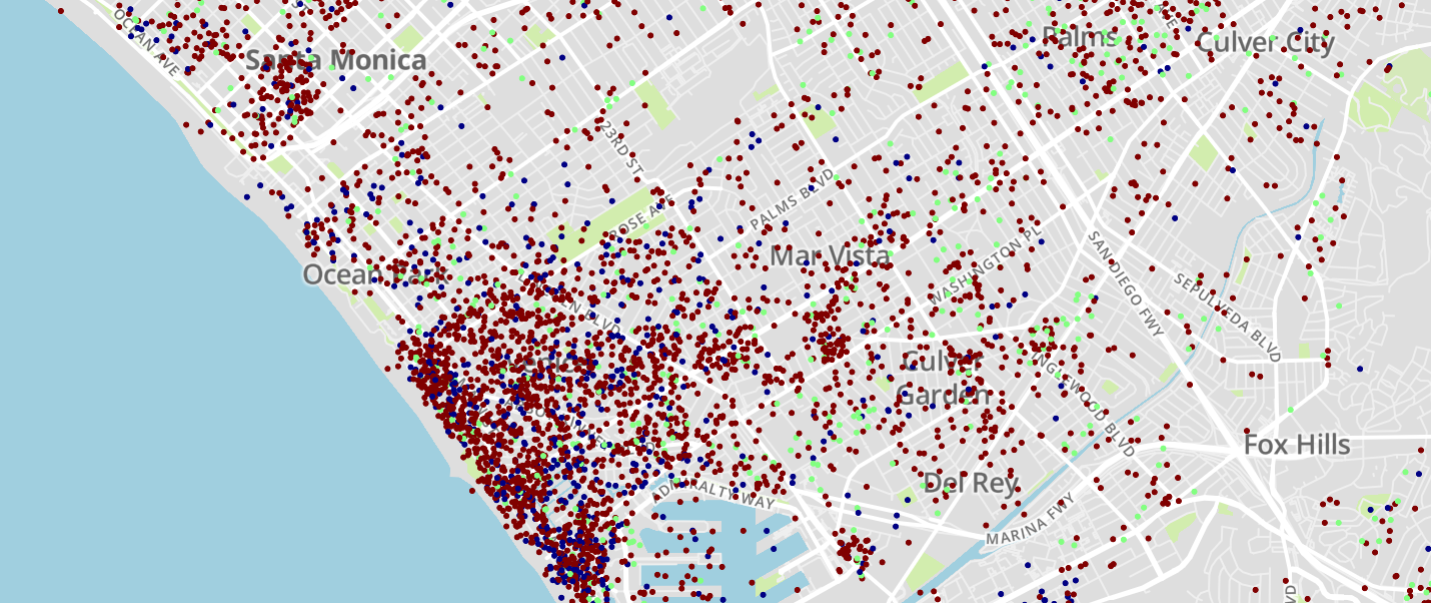

In [148]:
# Load image in case of problems loading the interactive map

Image("Sunset_park.png")

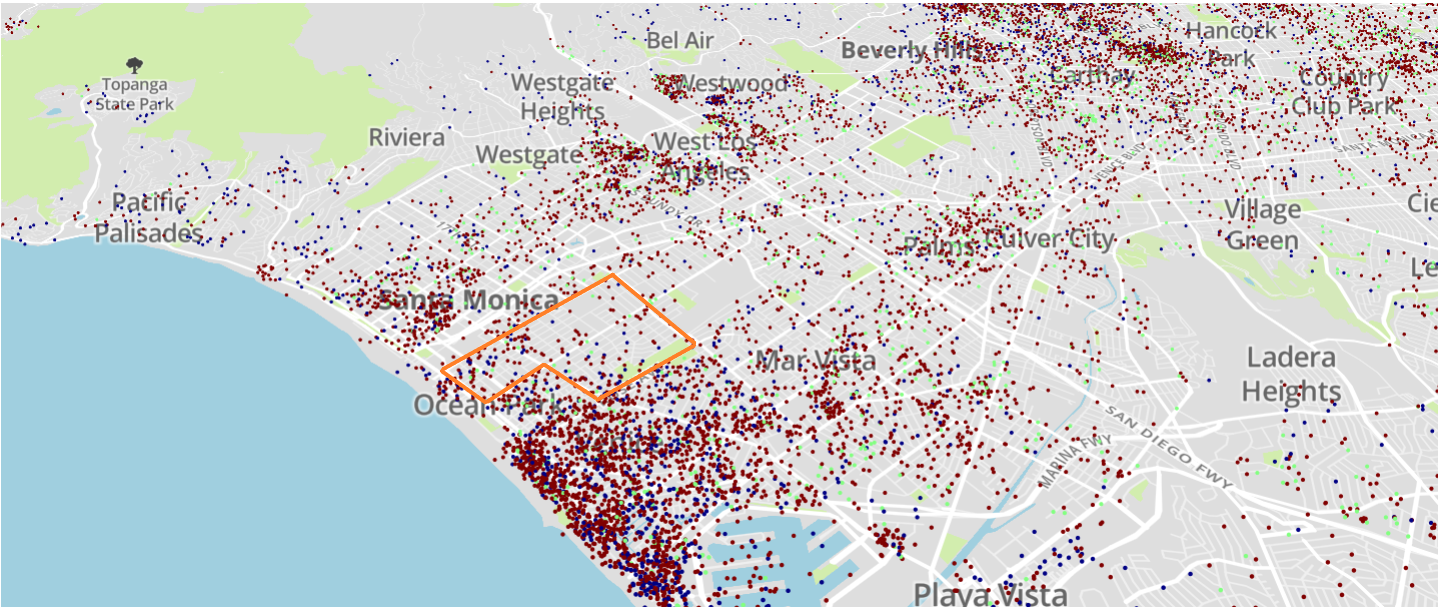

In [140]:
Image("Location1zoom.png")

Exploring further, we also noticed that Playa Vista area, next to Santa Monica, is also close to one the most demanded areas in LA and is less dense in terms of competitive listings available. This also could be a good place to run an Airbnb listing.

In [145]:
mapbox_access_token = 'pk.eyJ1IjoicHJvZGlsbG8iLCJhIjoiY2plc3cxbWJnMGVsbzJ3bXBidHJkOGRhYSJ9.LxiLCXUBQwVDiCePYR2MvQ'

data = Data([
    Scattermapbox(
        lat=X3.latitude,
        lon=X3.longitude,
        mode='markers',
        marker=Marker(
            size=4,
            color =X3['most_competitive'],
            colorscale= 'Jet'#'YlOrRd'
        ),
        text=[],
    )
])
layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=33.95,
            lon=-118.44
        ),
        pitch=0,
        zoom=11
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

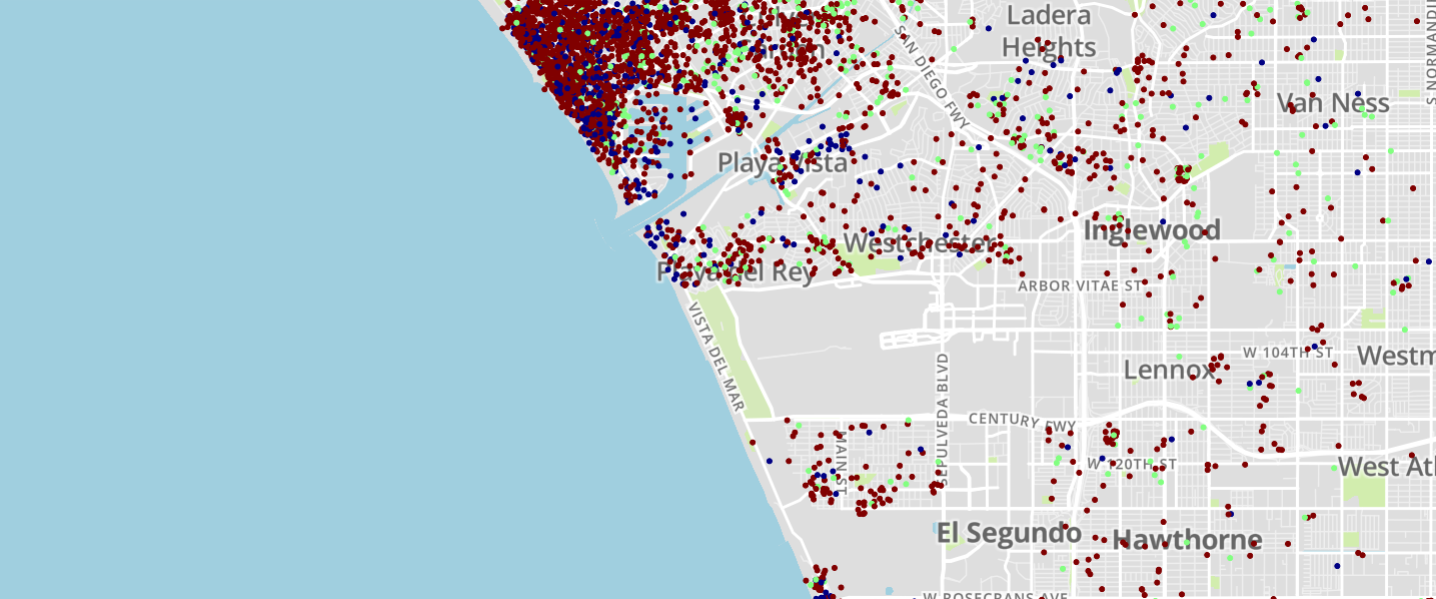

In [149]:
# Load image in case of problems loading the interactive map

Image("Playa_vista.png")

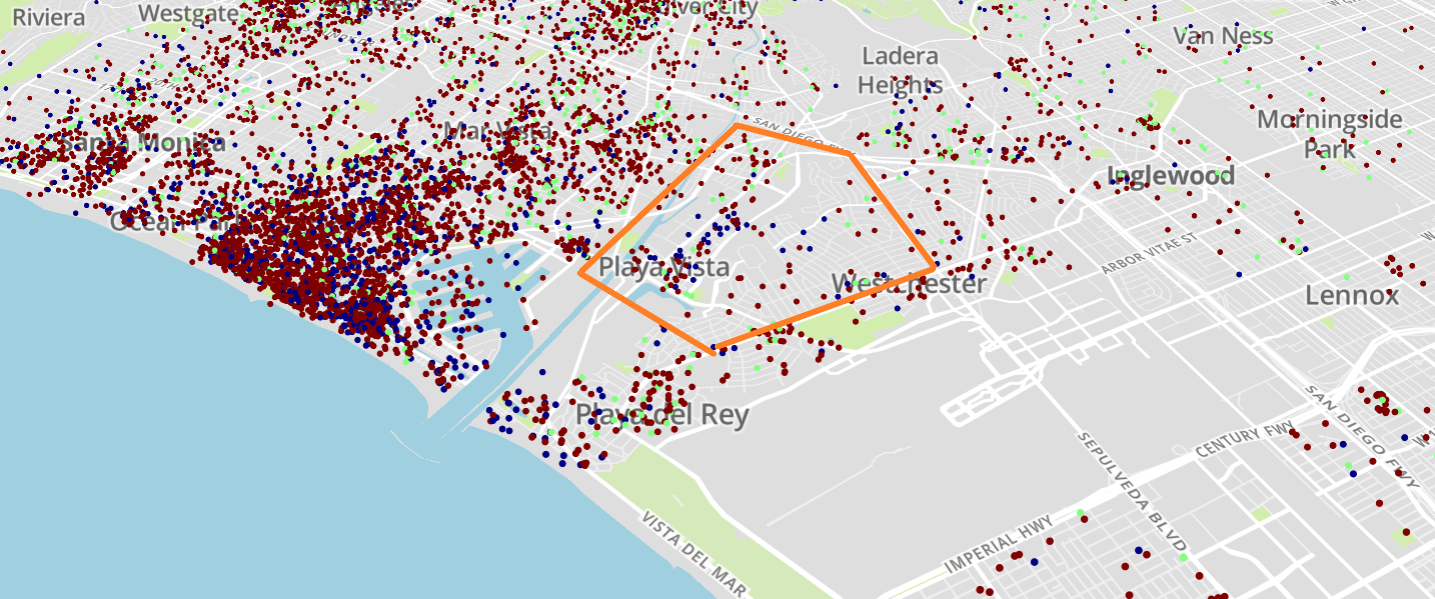

In [141]:
Image("Location2zoom.png")

### 4.3.2 Managerial Insight

Using this interactive map, we were able to recommend two places to explore for the hosts interested in expanding their Airbnb business or are thinking about entering to the business. 

Sunset Park and Playa Vista are next to highly demanded areas but are less overcrowded than those areas .Hence, these could be interesting places to locate an Airbnb listing. 

This tool that we designed can be shared with those who might be interested in making further explorations of the LA Airbnb business and can be complemented with more data in the future.

### 4.1.3 Machine Learning

For this finding, we used the unsupervised machine learning algorithm KMeans in order to identify clusters of highly competitive listings. We used the variables 'bedrooms', 'price', 'occupancy_rate_30', 'review_scores_rating' and 'number_amenities', to find 20 clusters. 

After finding the clusters, we averaged the variables for each cluster and we looked for those clusters that in average had the highest occupancy rate and rating score to define the listings in those clusters as the most competitive ones.